# Datathon de Mobilidade Urbana 2024

# Desafio 1: Correlação entre empreendimentos em mobilidade urbana e indicadores de mortos e feridos no trânsito: uma análise com base nos dados da MCID/SEMOB e do atlas da violência

## Sobre o projeto

- Link do site: https://simu.mdr.gov.br/datathon/
- Regulamento: https://simu.mdr.gov.br/wp-content/uploads/2024/05/REGULAMENTO-DATATHON-DE-MOBILIDADE-URBANA-2024.pdf

## Membros da equipe

- Matheus Rosa Such, Cientista de Dados
- Daiane Bertoldi Such, Engenheira Civil e especialista em planejamento urbano
- Guilherme Belegante, Engenheiro de Transporte e Logistica

## Objetivo

Analisar os empreendimentos em mobilidade urbana da carteira de empreendimentos da MCID/SEMOB e sua correlação no território com os indicadores de mortos e feridos no trânsito mantidos pelo Atlas da Violência, considerando o tipo de programa do empreendimento.

## Banco de dados utilizados

- `df_empreendimentos`: https://bigdata-arquivos.icict.fiocruz.br/PUBLICO/SIMU/bases_dados/CARTEIRA/simu-carteira-mun-T.zip
- `df_municipios`: https://pcdas.icict.fiocruz.br/wp-content/uploads/2024/05/simu_carteira_municipios.csv
- `df_populacao`: https://pcdas.icict.fiocruz.br/wp-content/uploads/2024/05/simu_carteira_populacao.csv
- `df_acidentes`: https://www.ipea.gov.br/atlasviolencia/filtros-series/12/violencia-no-transito

## Etapas do projeto

### Estudos sobre o tema

#### Informações gerais que guiaram o projeto

A segurança do trânsito é um tema de relevância mundial, sendo um dos pilares fundamentais para o desenvolvimento sustentável e a proteção da vida humana. Em resposta aos alarmantes índices de acidentes e fatalidades no trânsito, a Organização das Nações Unidas (ONU) estabeleceu a Década de Ação pela Segurança no Trânsito no período de 2011-2020, e posteriormente determinou como Segunda Década de Ação pela Segurança no Trânsito o período de 2021-2030.

Assim, foi proclamado, por meio da Resolução A/RES/64/2552, adotada em março de 2010, o período de 2011 a 2020 como a Década de Ação pela Segurança no Trânsito. O objetivo primordial era que cada país membro elaborasse um plano para definir políticas, programas, ações e metas para reduzir a quantidade de mortos em acidentes de trânsito em 50% no período de dez anos.

No Brasil, a Década de Ação pela Segurança no Trânsito foi lançada em 11 de maio de 2011, sendo o marco para várias ações dos órgãos envolvidos com a fiscalização e a infraestrutura viária no enfrentamento aos acidentes de trânsito. Em seguida, foi proclamado o intervalo de 2021 a 2030 como a Segunda Década de Ação pela Segurança no Trânsito, novamente com a meta de reduzir pela metade o número de mortes e feridos no trânsito no período.

Referência: https://www.gov.br/transportes/pt-br/assuntos/transito/arquivos-senatran/Anexo_I_pnatrans.pdf

#### Motivação

A motivação deste estudo é a realização de uma análise detalhada dos empreendimentos de modo a identificar padrões e tendências, na busca por informações que possam ser utilizadas na gestão da mobilidade urbana e na formulação de políticas públicas eficientes. Além disso, ao correlacionar os dados de mobilidade urbana com os indicadores de violência no trânsito, espera-se uma maior compreensão acerca das áreas que necessitam de maior atenção e investimento, promovendo um desenho urbano e ambiente viário mais seguros e sustentáveis.

### Limpeza e pré-processamento de dados

- Verificação de campos vazios e irregulares
- Tratamento dos tipos colunas: strings, valores, números e datas
- Buscar por similaridades entre os bancos de dados

### Análise exploratória dos dados

- Avaliação dos dados via tabelas
- Geração de gráficos para análise visual dos dados
- Criação de novas variaveis e nuvem de palavras

### Modelagem de dados

- Aplicação de modelo para categorização de empreendimentos com modelo preditivo
- Avaliação de modelos de regressão linear para avaliar possível correlação dos empreendimentos com a variação na taxa de mortos
- Conclusões dos modelos de dados propostos

### Considerações finais do projeto

- Conclusões dos dados encontrados
- Considerações finais sobre o projeto
- Recomendações para futuros avanços

## Biblotecas utilizadas

In [92]:
# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# Manipulação e Análise de Dados
import pandas as pd
import numpy as np
from collections import Counter

# Widgets para Jupyter Notebook
import ipywidgets as widgets
from ipywidgets import GridspecLayout, Layout
from IPython.display import display, clear_output

# Processamento de Linguagem Natural (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from unidecode import unidecode
from gensim.models import Word2Vec
import spacy
import re
import string

# Machine Learning - Modelos de Classificação
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans

# Machine Learning - Modelos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Configurações e Utilitários
import warnings
warnings.filterwarnings('ignore')

# Baixa os recursos do NLTK
nltk.download('stopwords')

# Carrega o modelo de linguagem do spaCy para português
nlp = spacy.load('pt_core_news_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matsu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Limpeza e pré-processamento de dados

## Carregamento dos dados

In [93]:
# abre a tabela de empreendimentos
df_empreendimentos = pd.read_csv('./simu_carteira_muni.csv')

# abre a tabela de acidentes
df_acidentes = pd.read_csv('./acidentes_transportes.csv')

# tabelas auxiliares
df_municipios = pd.read_csv('./municipios.csv')
df_populacao = pd.read_csv('./populacao.csv')

## Analise preliminar

In [94]:
# identifica colunas iguais dentro dos dois dataframes analisados para entender quais são as interseções que podemos fazer
similar_columns = [col for col in df_empreendimentos.columns if col in df_municipios.columns]
similar_columns

['uf_SIGLA_UF',
 'mun_MUNNOMEX',
 'Código IBGE',
 'mun_MUNNOME',
 'mun_AMAZONIA',
 'mun_FRONTEIRA',
 'mun_CAPITAL',
 'uf_CODIGO_UF',
 'mun_LATITUDE',
 'mun_LONGITUDE',
 'mun_ALTITUDE',
 'mun_AREA',
 'mun_codigo_adotado',
 'uf_NOME_UF']

In [95]:
# identifica colunas iguais dentro dos dois dataframes analisados para entender quais são as interseções que podemos fazer
similar_columns = [col for col in df_empreendimentos.columns if col in df_acidentes.columns]
similar_columns

['uf_SIGLA_UF',
 'mun_MUNNOMEX',
 'Código IBGE',
 'ano',
 'mun_MUNNOME',
 'Populacao',
 'mun_AMAZONIA',
 'mun_FRONTEIRA',
 'mun_CAPITAL',
 'uf_CODIGO_UF',
 'mun_LATITUDE',
 'mun_LONGITUDE',
 'mun_ALTITUDE',
 'mun_AREA',
 'mun_codigo_adotado',
 'uf_NOME_UF',
 'Região',
 'uf_REGIAO',
 'Município',
 'mun_coordenadas']

In [96]:
df_empreendimentos.isna().sum().sort_values(ascending=False)

dte_ult_ref_bm         71201
ano_ult_ref_bm         71201
cod_ag_operador        70216
cod_saci               69038
vlr_desembolsado_21    66741
                       ...  
cod_id_pac                 0
acao                       0
emp_gerado                 0
pop_beneficiada            0
cod_mdr                    0
Length: 91, dtype: int64

In [97]:
print('número de vazios na coluna "Município": ', df_empreendimentos['Município'].isna().sum())

número de vazios na coluna "Município":  41240


#### Descrição das etapas abaixo

A partir daqui, foram aplicados funções para conseguir preencher valores de municípios vazios encontrados na tabela de empreendimentos utilizando as tabelas auxiliares `df_municipios` e `df_populacao`. Foi assumida a premissa que segue a lei de não homonidade entre cidades do mesmo estado para seguir com esta junção, a partir de um código único de cidade-estado nos dataframes.

Também foram tratados alguns campos de valores financeiros vazios e conversão de campos de data na tabela de empreendimentos. Por fim, foram feitos filtros para buscar apenas obras que contiam o status de "concluida", retirado empreendimentos sem descrição e obras que finalizaram depois de 2020 - visto que a tabela `df_acidentes` só vai até este periodo.

In [98]:
# Função para preencher valores nulos em um dataframe com base em outro dataframe
def preenche_vazios_correspondentes(df, reference_df, on_column, reference_df_name):
    '''
    objetivo: preencher os valores nulos em um dataframe com base em outro dataframe

    entrada:
    df (dataframe): dataframe que terá os valores nulos preenchidos
    reference_df (dataframe): dataframe usado como referência para preenchimento
    on_column (str): nome da coluna usada para realizar o merge entre os dataframes e identificar os valores correspondentes
    reference_df_name (str): nome do DataFrame de referência
    '''

    for column in reference_df.columns:
        if column != on_column:  # ignora a coluna de merge para não sobrepor
            reference_column_name = column + '_' + reference_df_name
            df[column] = df[column].fillna(df[reference_column_name])

In [99]:
def trata_dados_vazios_municipios_populacao(df_empreendimentos, df_municipios, df_populacao):
    
    '''
    objetivo: tratar os dados vazios que estão na tabela df_empreendimentos utilizando as bases auxiliares df_municipios
               e df_populacao
               
    No Brasil não existem cidades com o mesmo nome dentro do mesmo estado. 
    Desde 1984, uma lei determina a consulta ao IBGE na criação ou alteração de nomes de cidades, 
    para garantir que um nome já existente em todo o Brasil não seja adotado.

    Segundo informações citadas: "Não há cidades homônimas em um mesmo estado e, desde 1984, uma lei determina
    a consulta ao IBGE na criação ou na alteração para que um nome já existente em todo o Brasil não seja adotado."

    Reportagem: https://g1.globo.com/brasil/noticia/2014/04/uma-em-cada-11-cidades-do-pais-tem-uma-homonima.html#:~:text=N%C3%A3o%20h%C3%A1%20cidades%20hom%C3%B4nimas%20em,o%20Brasil%20n%C3%A3o%20seja%20adotado.

    entrada:
    df_empreendimentos (dataframe): dataframe com os dados de empreendimentos
    df_municipios (dataframe): dataframe com os dados de municipios
    df_populacao (dataframe): dataframe com os dados de populacao
    
    saída:
    df_empreendimentos (dataframe): dataframe com os dados de empreendimentos com os dados de município vazio já tratados
    
    '''
    
    # cria a 'codigo_unico' em ambos os dataframes de municipios e empreendimentos para mesclar
    df_municipios['codigo_unico'] = df_municipios['mun_MUNNOMEX'] + df_municipios['uf_SIGLA_UF']
    df_empreendimentos['codigo_unico'] = df_empreendimentos['mun_MUNNOMEX'] + df_empreendimentos['uf_SIGLA_UF']

    # faz o merge dos dataframes com base no 'codigo_unico'
    df_merged = pd.merge(df_empreendimentos, df_municipios, on='codigo_unico', suffixes=('', '_municipios'))

    # preenche os valores vazios do df_empreendimentos com os valores correspondentes do df_municipios
    preenche_vazios_correspondentes(df_merged, df_municipios, 'codigo_unico', 'municipios')

    # remove as colunas adicionais que vieram do merge
    columns_to_drop = [col for col in df_merged.columns if col.endswith('_municipios')]
    df_merged.drop(columns=columns_to_drop, inplace=True)

    # atualiza df_empreendimentos com os valores preenchidos
    df_empreendimentos = df_merged

    # ordena e mantém apenas as últimas entradas de população por Código IBGE
    df_populacao = df_populacao.sort_values('ano').drop_duplicates('Código IBGE', keep='last').drop(columns=['ano'])

    # faz o merge dos dataframes com base em 'Código IBGE'
    df_merged = pd.merge(df_empreendimentos, df_populacao, on='Código IBGE', suffixes=('', '_populacao'))

    # preenche os valores vazios em df_empreendimentos com os valores correspondentes de df_populacao
    preenche_vazios_correspondentes(df_merged, df_populacao, 'Código IBGE', 'populacao')

    # Atualiza df_empreendimentos com os valores preenchidos
    df_empreendimentos = df_merged
    
    # preenche os valores NaN na coluna 'Município' com base na coluna 'mun_MUNNOMEX'
    df_empreendimentos['Município'] = df_empreendimentos['mun_MUNNOMEX'].str.capitalize()
    
    return df_empreendimentos

df_empreendimentos = trata_dados_vazios_municipios_populacao(df_empreendimentos, df_municipios, df_populacao)

In [100]:
# Contagem dos valores de 'ano_fim_obra'
df_empreendimentos['ano_fim_obra'].value_counts().sort_index()

ano_fim_obra
2000.0        2
2002.0        1
2003.0        1
2012.0        2
2013.0       10
2014.0       17
2015.0    23522
2016.0     1161
2017.0     1808
2018.0     2466
2019.0     3152
2020.0     3550
2021.0     3595
2022.0     5057
2023.0     1670
Name: count, dtype: int64

In [101]:
# conta quantas linhas existem para cada 'ano' na tabela de acidentes, representando a quantidade de cidades por ano
df_acidentes['ano'].value_counts().sort_index()

ano
2010    5570
2011    5570
2012    5570
2013    5570
2014    5570
2015    5570
2016    5570
2017    5570
2018    5570
2019    5570
Name: count, dtype: int64

In [102]:
df_empreendimentos['situacao_obra'].value_counts().sort_index()

situacao_obra
ADIANTADA                                                         3
ATRASADA                                                         43
COM AUTORIZAÇÃO PARA INÍCIO                                     848
CONCLUIDA                                                       454
EXECUÇÃO INICIADA                                              3325
EXECUÇÃO NÃO INICIADA                                         20725
NAO INICIADA                                                     21
NORMAL                                                           42
OBJETO CONCLUÍDO                                              42016
OBRA FISICA CONCLUIDA                                            18
OBRA FÍSICA CONCLUÍDA                                             6
OBRA NAO EXECUTADA - CONTRATO CANCELADO - DIVIDA LIQUIDADA       12
OBRA PARALISADA                                                1403
PARALISADA                                                       34
Name: count, dtype: int64

In [103]:
# identifica as colunas que contêm "vlr_" no nome
vlr_columns = [col for col in df_empreendimentos.columns if 'vlr_' in col]

# preenche os valores vazios nas colunas identificadas com "vlr_" com 0 
for col in vlr_columns:
    df_empreendimentos[col] = df_empreendimentos[col].fillna(0)
    
# converte os campos de data inicio e fim de obra em datatime
df_empreendimentos['dte_inicio_obra'] = pd.to_datetime(df_empreendimentos['dte_inicio_obra'])
df_empreendimentos['dte_fim_obra'] = pd.to_datetime(df_empreendimentos['dte_fim_obra'])

# retira os empreendimentos finalizados após 2020 para analisar o mesmo periodo da base de acidentes (2010 a 2019)
# filtra a tabela para reduzir a análise
df_empreendimentos = df_empreendimentos[(df_empreendimentos['ano_fim_obra'] < 2020)] # retirar este filtro caso tenha um banco de dados mais completo

# retira todas as obras que nao possuem 'situacao_obra' como concluida
obras_concluidas = ['OBJETO CONCLUÍDO', 'CONCLUIDA', 'OBRA FISICA CONCLUIDA', 'OBRA FÍSICA CONCLUÍDA']
df_empreendimentos = df_empreendimentos[df_empreendimentos['situacao_obra'].isin(obras_concluidas)]

# retira empreendimentos onde a descrição esta vazio
df_empreendimentos = df_empreendimentos[~df_empreendimentos['empreendimento'].isna()]

In [104]:
# faz um subset dos dataframes para buscar apenas algumas informações mais relevantes
df_acid = df_acidentes[['mun_codigo_adotado', 'Código IBGE', 'Município', 'ano', 'mun_MUNNOMEX',
                        'uf_REGIAO', 'Pedestre_mortes', 'Ciclista_mortes', 'Motociclista_mortes',
                        'Ocup_triciclo_motor_mortes', 'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes', 
                        'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes', 'Populacao', 
                        'total_mortes', 'Pedestre_feridos', 'Ciclista_feridos', 'Motociclista_feridos', 
                        'Ocup_triciclo_motor_feridos', 'Ocup_automovel_feridos', 'Ocup_caminhonete_feridos',
                        'Ocup_veic_transp_pesado_feridos', 'Ocup_onibus_feridos', 'Outros_feridos', 'total_feridos',
                        'taxa_mun_feridos', 'taxa_mun_mortes']]

df_empreend = df_empreendimentos[['mun_codigo_adotado', 'Código IBGE', 'programa', 'empreendimento',
                                 'dsc_situacao_contrato_mdr', 'vlr_repasse_financiamento', 'vlr_contrapartida',
                                 'vlr_empenhado', 'vlr_desembolsado', 'vlr_desembolsado', 'vlr_desbloqueado',
                                 'vlr_desembolsado_19', 'vlr_desembolsado_20', 'vlr_desembolsado_21', 
                                 'situacao_obra', 'situacao_obra_base_validacao', 'situacao_contrato', 
                                 'dte_assinatura', 'dte_inicio_obra', 'dte_fim_obra', 'agente_financeiro_saci', 
                                 'dias_paralisados', 'situacao_obra_base_validacao_secex', 'vlr_investimento', 
                                 'Populacao', 'mun_MUNNOME', 'uf_REGIAO', 'mun_MUNNOMEX', 'uf_NOME_UF', 'Município', 
                                 'ano_fim_obra', 'ano_inicio_obra']]

In [105]:
df_empreendimentos.isna().sum().sort_values(ascending=False)

dte_ult_ref_bm         31402
ano_ult_ref_bm         31402
cod_ag_operador        31141
cod_saci               31126
cod_proposta           18065
                       ...  
vlr_desembolsado_19        0
vlr_desbloqueado           0
vlr_desembolsado           0
vlr_empenhado              0
Populacao_populacao        0
Length: 95, dtype: int64

In [106]:
print('número de linhas vazias na coluna "Município":', df_empreendimentos['Município'].isna().sum())

número de linhas vazias na coluna "Município": 0


## Análise exploratória dos dados

Aqui foi iniciada a etapa de análise exploratória, criado tabelas, gráficos e cálculos para ter uma melhor compreensão do comportamento da tabela

In [107]:
def variacao_populacao_taxa_mortes(df_acidentes):
    
    '''
    objetivo: fazer o calculo da variação populacional e taxa de mortes no periodo acumulado de 2010 a 2019
    
    entrada:
    df_acidentes (dataframe): dataframe com os dados de mortes e feridos
    
    saída:
    string (stg): print com a variação populacional e da taxa de mortes de 2010 x 2019
    
    '''
    
    df = df_acidentes.copy()
    
    df = df[['ano', 'Populacao', 'Código IBGE', 'total_mortes', 'total_feridos']]
    var_populacao = round((df[df['ano'] == 2019]['Populacao'].sum() / df[df['ano'] == 2010]['Populacao'].sum() - 1)*100, 2)
    print('A População variou de 2010 a 2019:',
          var_populacao, '%')

    taxa_mortes_2010 = round(df[df['ano'] == 2010]['total_mortes'].sum() / df[df['ano'] == 2010]['Populacao'].sum() * 100000, 2)
    taxa_mortes_2019 = round(df[df['ano'] == 2019]['total_mortes'].sum() / df[df['ano'] == 2019]['Populacao'].sum() * 100000, 2)

    print('A taxa de mortes variou de 2010 a 2019:',
          round((taxa_mortes_2019 / taxa_mortes_2010 - 1) * 100, 2), '%')

    return

variacao_populacao_taxa_mortes(df_acid)

A População variou de 2010 a 2019: 10.17 %
A taxa de mortes variou de 2010 a 2019: -32.32 %


**Variação da População**
- A população variou de 2010 a 2019 em 10.17%, representando um aumento na quantidade de pessoas neste periodo.

**Variação da Taxa de Mortes**
- A taxa de mortes variou de 2010 a 2019 em -32.32%, representando uma queda na taxa de mortes no periodo analisado

Abaixo foram feitos intervalos de populações para segmentar as cidades e analisar a distribuição de empreendimentos em cada fatia, como quantidade de empreedimentos e média de mortes.

In [108]:
# Definir os intervalos de população
bins = [0, 100000, 300000, 500000, 1000000, float('inf')]
labels = ['Menos que 100k', '100k a 300k', '300k a 500k', '500k a 1m', 'Acima de 1m']

# Criar uma nova coluna com os intervalos de população em ambas as tabelas
df_empreend['intervalo_populacao'] = pd.cut(df_empreend['Populacao'], bins=bins, labels=labels, right=False)
df_acid['intervalo_populacao'] = pd.cut(df_acid['Populacao'], bins=bins, labels=labels, right=False)

In [109]:
df_empreend.groupby('intervalo_populacao')['empreendimento'].count() / df_empreend.shape[0] * 100

intervalo_populacao
Menos que 100k    91.044253
100k a 300k        5.641515
300k a 500k        1.273480
500k a 1m          1.372174
Acima de 1m        0.668577
Name: empreendimento, dtype: float64

In [110]:
# faz a media de feridos e mortos ao longo dos anos para cada faixa de intervalo da populacao
df_acid.groupby('intervalo_populacao')[['total_mortes','total_feridos']].mean().rename(columns={'total_mortes':'media_mortes',
                                                                                                 'total_feridos':'media_feridos'
                                                                                                })

,media_mortes,media_feridos
intervalo_populacao,,
Menos que 100k,3.517606,6.076327
100k a 300k,34.711645,189.934381
300k a 500k,79.415730,507.186517
500k a 1m,135.077551,1136.767347
Acima de 1m,376.684848,2870.006061


Durante este estudo, identificamos que a tabela df_acidentes continha diversos dados inconsistentes nas colunas 'total_mortes' e 'total_feridos'. Observamos que muitas cidades apresentavam valores zerados nessas colunas, enquanto em outros casos, o valor de total_mortes era significativamente maior que o de total_feridos.

In [111]:
# valores da média e mediana da coluna total_mortes
print("Média da coluna 'total_mortes':", round(df_acid['total_mortes'].mean(), 0))
print("Mediana da coluna 'total_mortes':", df_acid['total_mortes'].median())

Média da coluna 'total_mortes': 7.0
Mediana da coluna 'total_mortes': 2.0


In [112]:
# valores da média e mediana da coluna total_feridos
print("Média da coluna 'total_feridos':", round(df_acid['total_feridos'].mean(), 0))
print("Mediana da coluna 'total_feridos':", df_acid['total_feridos'].median())

Média da coluna 'total_feridos': 31.0
Mediana da coluna 'total_feridos': 0.0


In [113]:
# cria uma lista e conta com a quantidade de 'Código IBGE' unico que em qualquer momento teve o valor de total_feridos zerado
qtd_feridos_zerados = len(df_acid[df_acid['total_feridos'] == 0]['Código IBGE'].unique().tolist())
print('Quantidade de cidades onde em qualquer periodo o número de feridos foi igual a zero:', qtd_feridos_zerados)

Quantidade de cidades onde em qualquer periodo o número de feridos foi igual a zero: 5279


In [114]:
# procura cidades que tiveram zero acidentes em qualquer momento na base de acidentes
df_acid[df_acid['total_feridos'] == 0][['Código IBGE', 'Município', 'ano',
                                        'Populacao', 'total_mortes', 'total_feridos']].sort_values('Populacao')

,Código IBGE,Município,ano,Populacao,total_mortes,total_feridos
4605,4220000,Balneário Rincão,2010,0,0.0,0.0
10493,4314548,Pinto Bandeira,2011,0,0.0,0.0
10730,5006275,Paraíso das Águas,2011,0,0.0,0.0
4503,4212650,Pescaria Brava,2010,0,0.0,0.0
5160,5006275,Paraíso das Águas,2010,0,0.0,0.0
...,...,...,...,...,...,...
30298,3118601,Contagem,2015,648766,77.0,0.0
35868,3118601,Contagem,2016,653800,45.0,0.0
41438,3118601,Contagem,2017,658580,71.0,0.0
47008,3118601,Contagem,2018,659070,71.0,0.0


In [115]:
# filtra a cidade cujo código IBGE é 3118601 para análise dos registros de acidentes
df_acid[df_acid['Código IBGE'] == 3118601][['Código IBGE', 'Município',
                                            'ano', 'Populacao', 'total_mortes', 'total_feridos']]

,Código IBGE,Município,ano,Populacao,total_mortes,total_feridos
2448,3118601,Contagem,2010,603442,75.0,5.0
8018,3118601,Contagem,2011,608715,65.0,0.0
13588,3118601,Contagem,2012,613815,79.0,0.0
19158,3118601,Contagem,2013,637961,52.0,1.0
24728,3118601,Contagem,2014,643476,76.0,0.0
30298,3118601,Contagem,2015,648766,77.0,0.0
35868,3118601,Contagem,2016,653800,45.0,0.0
41438,3118601,Contagem,2017,658580,71.0,0.0
47008,3118601,Contagem,2018,659070,71.0,0.0
52578,3118601,Contagem,2019,663855,56.0,0.0


Analisando a tabela acima, observamos um comportamento incomum nos dados de 'total_feridos'. Enquanto os valores de 'total_mortes' parecem estar dentro do esperado, os dados de 'total_feridos' estão, em sua maioria, zerados, o que não é o padrão esperado.

Observa-se que em muitas cidades, a taxa de feridos calculada acaba sendo zero, mesmo quando a taxa de mortes calculada é alta. Isso sugere a presença de erros de preenchimento nos dados de feridos na tabela. Em análises futuras, será realizado um tratamento específico para minimizar essas situações, visando garantir a qualidade e precisão dos resultados obtidos.

### Base de dados a serem utilizadas nas próximas análises

In [116]:
def cria_bases_analise(tamanho_populacao, df_acidentes, df_empreendimentos):
    """
    objetivo: filtrar e preparar bases de dados para análise de acidentes e empreendimentos. Esta função realiza dois filtros
               principais nos dados de acidentes:
                1. mantem apenas municípios com população acima de um determinado tamanho.
                2. exclui municípios onde há registros possivelmente errados 
                3. filtra a base de dados de empreendimentos para manter apenas municípios que
                   atenderam ao critério de população.
    
    o filtro 2 foi feito pois assumimos que dificilmente haveria situações onde:
    - número de mortes ou feridos igual a zero
    - OU número de feridos é menor que o número de mortes
    
    Se em algum ano dentro da tabela de acidentes uma cidade possui uma das condições citadas acima, ela é excluida da análise.
    não apenas o ano em que o possível erro foi encontrado, mas também todos os registros de acidentes daquela cidade, visto que
    possivelmente esse erro pode ter acontecido para outras informações.
    
    Isto foi definido pois encontramos vários casos nesta situação, tanto em pequenas, médias e grandes cidades. Devido a isso,
    nossas análises apresentadas neste notebook estavam dando divergências.

    entrada:
    tamanho_populacao (int): tamanho mínimo da população para filtrar os municípios.
    df_acidentes (dataframe): dataframe contendo os dados de acidentes com as colunas:
                            ['Código IBGE', 'Populacao', 'total_mortes', 'total_feridos'].
    df_empreendimentos (dataframe): dataframe contendo os dados de empreendimentos com a coluna: 
                                    ['Código IBGE'].

    saída:
    - df_filtrado_acidentes (dataframe): dataframe contendo os dados de acidentes filtrados.
    - df_filtrado_emprend (dataframe): dataframe contendo os dados de empreendimentos filtrados.
    """
    
    # cria uma lista de municípios que tiveram em qualquer momento uma população >= a 'tamanho_populacao'
    lista_municipios = df_acidentes[df_acidentes['Populacao'] >= tamanho_populacao]['Código IBGE'].unique().tolist()
    
    # cria uma lista de municípios que em qualquer momento tiveram zero mortes ou feridos
    # ou o número de feridos foi maior que o número de mortes
    lista_dados_errados = df_acidentes[(df_acidentes['total_mortes'] == 0) | 
                                       (df_acidentes['total_feridos'] == 0) | 
                                       (df_acidentes['total_feridos'] < df_acidentes['total_mortes'])]['Código IBGE'].unique().tolist()
    
    # filtra a base de acidentes para buscar apenas cidades que atingiram ao menos o 'tamnho_populacao'
    df_filtrado_acidentes = df_acidentes[df_acidentes['Código IBGE'].isin(lista_municipios)]
    
    # retira da base cidades possiveis cidades que estão na lista_dados_errados
    df_filtrado_acidentes = df_filtrado_acidentes[~df_filtrado_acidentes['Código IBGE'].isin(lista_dados_errados)]
    
    # filtra a base de empreendimentos para buscar apenas cidades que atingiram ao menos o 'tamnho_populacao'
    df_filtrado_emprend = df_empreendimentos[df_empreendimentos['Código IBGE'].isin(lista_municipios)]
    
    return df_filtrado_acidentes, df_filtrado_emprend

df_filtrado_acidentes, df_filtrado_empreend = cria_bases_analise(300000, df_acid, df_empreend)

In [117]:
# função de pré-processamento
def preprocess_text(text):
    
    '''
    objetivo: fazer o tratamento de texto da coluna de empreendimento para futuro processamento
              em modelo preditivo e nuvem de palavras
    
    Para utilizar esta função, basta fazer um apply na coluna que contenha os textos a serem processados    
    '''
    
    # converte todo o texto para minusculo
    text = text.lower()
    
    # remove números, acentos e caracteres especiais
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # tokeniza e retira as stop words
    stop_words = set(stopwords.words('portuguese'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    stemmer = SnowballStemmer('portuguese')
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

**Nuvem de palavras:** A criação de uma nuvem de palavras teve como propósito identificar padrões nas descrições dos empreendimentos, o que permitiu classificá-los com termos mais comuns dentro da mobilidade urbana. Esse processo visa facilitar análises posteriores e proporcionar uma compreensão mais aprofundada da correlação entre esses empreendimentos e o número de mortes e feridos nas cidades.

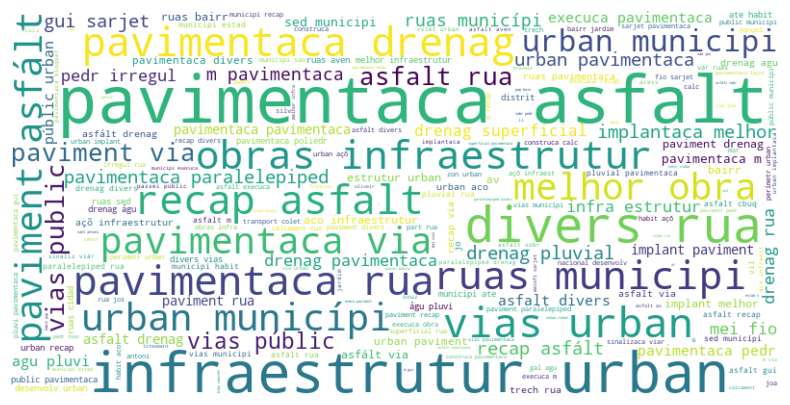

In [118]:
def gerador_nuvem_palavras(df_empreendimentos):
    '''
    objetivo: gerar uma nuvem de palavras para analise visual das palavras que mais 
              aparecem e se destacam na coluna de empreendimentos
    
    parâmetros de entrada:
    df_empreendimentos (dataframe) - dataframe de empreendimentos que contenha a coluna 'empreendimento'
    
    saida: 
    word_counts_df (dataframe) - dataframe com duas colunas: 'termo' e 'frequencia' que conta quantas vezes a palavra apareceu na nuvem de palavras
    wordcloud (plot) - grafico com as nuvem de palavras
    '''

    df_nuvem = df_empreendimentos.copy()
    
    # aplica o pré-processamento à coluna "empreendimento"
    df_nuvem['empreendimento_processado'] = df_nuvem['empreendimento'].apply(preprocess_text)

    # concatena todas as frases em um único texto
    all_text = ' '.join(df_nuvem['empreendimento_processado'])

    # gera uma nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # cria uma tabela para contar a frequencia que cada palavra aparece
    word_counts = Counter(all_text.split())
    word_counts_df = pd.DataFrame(word_counts.items(), columns=['Termo', 'Frequencia'])

    # ordena o dataframe criado por frequencia
    word_counts_df = word_counts_df.sort_values(by='Frequencia', ascending=False)

    # plota a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    return word_counts_df

word_counts_df = gerador_nuvem_palavras(df_empreend)

In [119]:
word_counts_df.head()

,Termo,Frequencia
4,pavimentaca,16106
81,urban,8255
134,ruas,8198
205,asfalt,7061
39,drenag,5648


Durante esse processo, realizamos iterações sucessivas. A cada iteração, com o auxilio da tabela `word_counts_df` e do plot da nuvem de palavras reduzíamos o conjunto de palavras observadas, removendo padrões identificados anteriormente. Dessa forma, conseguimos encontrar padrões menos óbvios e aprimorar a qualidade das análises.

In [120]:
# atribui as categorias de acordo com os padrões, respeitando a ordem das listas
def categoriza_manual(df_empreendimentos):
    """
    objetivo: categorizar os empreendimentos com base em padrões identificados previamente. O processo de categorização
              é realizado com base em padrões identificados pela nuvem de palavras, as categorias são atribuídas
              respeitando a ordem de prioridade definida pela lista_geral.

    entrada:
    df (dataframe): O dataframe contendo a coluna 'empreendimento' com as descrições dos empreendimentos.

    saída:
    df (dataframe): O dataframe com uma nova coluna 'categoria', indicando a categoria de cada empreendimento.
    """
    
    df = df_empreendimentos.copy()
    
    # cria listas com padrões encontrados previamente pela nuvem de palavras na lista de empreendimentos
    categoria_sinalizacao = ['SINALIZA', 'SINALIZACAO', 'SEMAROFO', 'SEMAF', 'VERTICAL', 'HORIZONTAL']
    categoria_calcadas = ['CALCAD', 'CALC', 'CALCADA', 'PASSEIO', 'ACESSIB', 'PASSARELA', 'PASSARE']
    categoria_transporte_coletivo = ['ONIB', 'REFROTA', 'ONIBUS', 'COLETIVO', 'COLET',
                                     'CORREDOR', 'CORRED', 'SISTEMA', 'TERMINAL', 'BRT', 'LINHA', 'METRO']
    categoria_ciclovia = ['CICLO', 'CICLOFAIXA', 'CICLOVIA', 'CICLOVIARIO']
    categoria_seguranca = ['ACIDENTES', 'ACIDEN', 'ACIDE', 'SEGURANCA', 'SEGUR']
    categoria_pavimentacao = ['PAVIME', 'ASFALTIC', 'RECAP', 'CALCA', 'CALCAMENTO']
    categoria_infraestrutura = ['INFRA', 'INFRAESTRUTURA', 'INFRATRUC', 'INFRA-ESTRUTURA', 'INFRA ESTRUTURA']

    # Lista geral de categorias com nomes
    lista_geral = [
        ('sinalizacao', categoria_sinalizacao),
        ('calcadas', categoria_calcadas),
        ('transporte_coletivo', categoria_transporte_coletivo),
        ('ciclovia', categoria_ciclovia),
        ('seguranca', categoria_seguranca),
        ('pavimentacao', categoria_pavimentacao),
        ('infraestrutura', categoria_infraestrutura)
    ]    
    
    # inicializa a coluna 'categoria' com 'outros'
    df['categoria'] = 'outros'
    
    for nome_da_lista, lista in lista_geral:
        padroes_regex = '|'.join(lista)

        df['categoria'] = np.where(
            (df['categoria'] == 'outros') & df['empreendimento'].str.contains(padroes_regex, case=False, na=False), 
            nome_da_lista,
            df['categoria']
        )
        
    return df

In [121]:
# faz um treinamento manual, baseado na função categoriza_manual
df_empreend_treinamento = categoriza_manual(df_filtrado_empreend)
df_empreend_treinado_manual = categoriza_manual(df_empreend)

Durante este processo, realizamos uma verificação manual de várias cidades e empreendimentos para avaliar se as categorias atribuídas faziam sentido e se ajustes eram necessários. Sempre que identificávamos a necessidade de ajuste, modificávamos os valores das listas de padrões na função `categoriza_manual`

Exemplo de verificação abaixo:

In [122]:
# verificando se faz sentido a categoria criada manualmente para fazer os ajustes necessários nas listas sugeridas
pd.set_option('display.max_colwidth', None) # código que mostra todo o texto de uma célula

# filtro para mostrar apenas 3 colunas para uma cidade especifica
df_empreend_treinado_manual[df_empreend_treinado_manual['Município'] == 'Belo horizonte'][['empreendimento', 'categoria']]

,empreendimento,categoria
416,BRT CRISTIANO MACHADO,transporte_coletivo
418,AMPLIACAO DA CENTRAL DE CONTROLE DE TRAFEGO,outros
419,IMPLANTACAO DE INFRAESTRUTURA DE SISTEMA DE TRANSPORTE COLETIVO POR ONIBUS DE ALTA CAPACIDADE - BRT AREA CENTRAL.,transporte_coletivo
420,"ADEQUACOES VIARIAS, ESTACAO SAO JOSE, ESTACOES DE TRANSFERENCIA, CIRCUITO FECHADO DE TV INCLUSIVE CAMERAS",outros
421,BOULEVARD ARRUDAS - TERESA CRISTINA,outros
422,VIA 210 (LIGACAO VIA DO MINERIO/TERESA CRISTINA),outros
431,"MELHORIA DA INFRA-ESTRUTURA URBANA NA VILA SANTA RITA DE CASSIA, NO MUNICIPIO DE BELO HORIZONTE",infraestrutura
438,REFORMA DE CORREDORES ESTRUTURAIS DE TRANSPORTE DA AVENIDA AMAZONAS.,transporte_coletivo
439,APOIO A PROJETOS DE CORREDORES ESTRUTURAIS DE TRANSPORTE COLETIVO URBANO-NACIONAL EM BELO HORIZONTE/MG,transporte_coletivo
440,PROGRAMA CICLOVIARIO DE BELO HORIZONTE/MG,ciclovia


In [123]:
def calcular_percentual_empreendimentos(df_empreendimentos):
    """
    objetivo: calcula a quantidade de empreendimentos por intervalo de população e categoria, 
    e o percentual que cada categoria representa do total do intervalo de população.

    entrada:
    df_empreendimentos (dataframe): dataframe contendo os dados dos empreendimentos com colunas 
                                ['intervalo_populacao', 'categoria' e 'empreendimento']

    saída:
    merged_df (dataframe): dataframe contendo a quantidade de empreendimentos por intervalo de população 
                           e categoria, o total de empreendimentos por intervalo de população, e o percentual 
                           que cada categoria representa do total do intervalo de população.
    """
    
    # conta a quantidade de empreendimentos por intervalo_populacao e categoria
    count_df = df_empreendimentos.groupby(['intervalo_populacao', 'categoria']).size().reset_index(name='quantidade_empreendimentos')

    # calcula o total de empreendimentos por intervalo_populacao
    total_empreendimentos = df_empreendimentos.groupby('intervalo_populacao').size().reset_index(name='total_empreendimentos')

    # mescla as contagens com os totais
    merged_df = pd.merge(count_df, total_empreendimentos, on='intervalo_populacao')

    # calcula a porcentagem
    merged_df['percentual'] = (merged_df['quantidade_empreendimentos'] / merged_df['total_empreendimentos']) * 100

    return merged_df

calcular_percentual_empreendimentos(df_empreend_treinado_manual)

,intervalo_populacao,categoria,quantidade_empreendimentos,total_empreendimentos,percentual
0,Menos que 100k,calcadas,1859,28597,6.500682
1,Menos que 100k,ciclovia,89,28597,0.311221
2,Menos que 100k,infraestrutura,2542,28597,8.889044
3,Menos que 100k,outros,778,28597,2.720565
4,Menos que 100k,pavimentacao,21723,28597,75.962514
5,Menos que 100k,seguranca,55,28597,0.192328
6,Menos que 100k,sinalizacao,841,28597,2.940868
7,Menos que 100k,transporte_coletivo,710,28597,2.482778
8,100k a 300k,calcadas,77,1772,4.345372
9,100k a 300k,ciclovia,16,1772,0.902935


Conforme tabela acima, observa-se uma concentração (75%) de empreendimentos de pavimentação em cidades com população menor que 100 mil. Considerando o objetivo de correlacionar empreendimentos com indicadores de segurança viária, optou-se por realizar um filtro de análise para cidades acima de 300 mil habitantes, onde percebe-se uma distribuição mais homogênea de categorias, entre elas a de transporte coletivo.

In [124]:
def formatar_valor(valor):
    """
    objetivo: formata um valor numérico em uma string com sufixos apropriados (bilhões, milhões, milhares) ou porcentagem.

    entrada:
    valor (float): O valor numérico a ser formatado.

    saída:
    str: O valor formatado como uma string, com um dos seguintes formatos:
        - 'x.x bi' para valores em bilhões
        - 'x.x MM' para valores em milhões
        - 'x.x k' para valores em milhares
        - 'x.xx%' para valores menores que mil
    """
    
    if valor >= 1e9:  # Bilhões
        return f'{valor / 1e9:.1f} bi'
    elif valor >= 1e6:  # Milhões
        return f'{valor / 1e6:.1f} MM'
    elif valor >= 1e3:  # Milhares
        return f'{valor / 1e3:.1f} k'
    else:
        return f'{valor:.2f}%'

In [125]:
def plotar_investimento_por_municipio(df):
    """
    objetivo: plotar uma visualização interativa do valor percentual de investimento por município,
              permitindo a filtragem por região.

    entrada:
    df (dataframe): dataframe contendo os dados de investimento, que deve conter as colunas:
                    ['uf_REGIAO', 'Município', 'vlr_repasse_financiamento']

    saída:
    gráfico de barras horizontal interativo, onde as barras representam os municípios com maior investimento percentual.

    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): Atualiza o gráfico quando há uma mudança nos widgets.
    - plotar_grafico(regiao): Filtra os dados e plota o gráfico de barras com base nos filtros selecionados.
    - update_municipios_options(change): Atualiza as opções do widget de municípios com base na região selecionada.
    - display_widgets(): Cria e exibe os widgets de seleção para regiões.
    """
    
    df_inicial = df.copy()

    def update_plot(change):
        plotar_grafico(regiao_widget.value)

    def plotar_grafico(regiao):
        output.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        
        # calcular o valor total investido em todas as cidades
        total_investido_total = df_filtrado['vlr_repasse_financiamento'].sum()
        
        # calcular a porcentagem do valor investido por município em relação ao valor total investido em todas as cidades
        municipio_investimento = (df_filtrado.groupby('Município')['vlr_repasse_financiamento'].sum() / total_investido_total * 100).sort_values().reset_index()

        # selecionar apenas os 20 primeiros valores
        municipio_investimento = municipio_investimento.tail(20)

        plt.figure(figsize=(10, 6))
        bars = plt.barh(municipio_investimento['Município'], municipio_investimento['vlr_repasse_financiamento'], 
                        color='royalblue', edgecolor='none')
        plt.xlabel('Porcentagem do Valor Total de Investimento')
        plt.title('Top 20 cidades que receberam mais investimento pelo total investido')

        for bar, valor in zip(bars, municipio_investimento['vlr_repasse_financiamento']):
            valor_formatado = formatar_valor(valor)
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, valor_formatado, ha='left', va='center')

        # remover as bordas externas do gráfico
        sns.despine(left=True, top=True)

        plt.tight_layout()
        with output:
            plt.show()

    def update_municipios_options(change):
        if change.new != 'Todos':
            municipios_filtrados = sorted(df[df['uf_REGIAO'] == change.new]['Município'].unique().tolist())
        else:
            municipios_filtrados = sorted(df['Município'].unique().tolist())
        municipio_widget.options = ['Todos'] + municipios_filtrados

    def display_widgets():
        regioes = ['Todos'] + sorted(df['uf_REGIAO'].unique().tolist())

        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        regiao_widget.observe(update_plot, names='value')

        return regiao_widget

    regiao_widget = display_widgets()

    # exibir widgets acima do gráfico
    display(regiao_widget)

    # criar área de saída para o gráfico
    output = widgets.Output()
    display(output)

    # exibir o gráfico abaixo dos widgets
    plotar_grafico('Todos')

# aplicando a função
plotar_investimento_por_municipio(df_empreend_treinado_manual)

Dropdown(description='Região:', options=('Todos', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'), valu…

Output()

No gráfico acima, vemos o percentual que cada cidade recebeu do valor de repasse financeiro com o financiamento total em todas as obras no país. Destaca-se que **São Paulo, Salvador e Belo Horizonte receberam 18,5% do total do investimento realizado**.

Quando filtramos por região, podemos observar o percentual que cada cidade recebeu em relação ao total investido naquela região.

In [126]:
def plotar_investimento_por_uf(df):
    """
    objetivo: plotar uma visualização interativa do valor percentual de investimento por estado,
              permitindo a filtragem por região.

    entrada:
    df (dataframe): dataframe contendo os dados de investimento, que deve conter as colunas:
                    ['uf_REGIAO', 'uf_NOME_UF', 'vlr_repasse_financiamento']

    saída:
    gráfico de barras horizontal interativo, onde as barras representam as unidades federativas com investimento percentual.
    
    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): Atualiza o gráfico quando há uma mudança nos widgets.
    - plotar_grafico(regiao): Filtra os dados e plota o gráfico de barras com base nos filtros selecionados.
    - display_widgets(): Cria e exibe os widgets de seleção para regiões.
    """
    
    df_inicial = df.copy()

    def update_plot(change):
        plotar_grafico(regiao_widget.value)

    def plotar_grafico(regiao):
        output.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        
        # calcular o valor total investido em todas os estados
        total_investido_total = df_filtrado['vlr_repasse_financiamento'].sum()
        
        # calcular a porcentagem do valor investido por estado em relação ao valor total investido
        uf_investimento = (df_filtrado.groupby('uf_NOME_UF')['vlr_repasse_financiamento'].sum() / total_investido_total * 100).sort_values().reset_index()

        plt.figure(figsize=(10, 6))
        bars = plt.barh(uf_investimento['uf_NOME_UF'], uf_investimento['vlr_repasse_financiamento'], 
                        color='royalblue', edgecolor='none')
        plt.xlabel('Porcentagem do Valor Total de Investimento')
        plt.title('Percentual de Investimento por Estado')

        for bar, valor in zip(bars, uf_investimento['vlr_repasse_financiamento']):
            valor_formatado = f"{valor:.2f}%"
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, valor_formatado, ha='left', va='center')

        # remover as bordas externas do gráfico
        sns.despine(left=True, top=True)

        plt.tight_layout()
        with output:
            plt.show()

    def display_widgets():
        regioes = ['Todos'] + sorted(df['uf_REGIAO'].unique().tolist())

        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        regiao_widget.observe(update_plot, names='value')

        return regiao_widget

    regiao_widget = display_widgets()

    # exibir widgets acima do gráfico
    display(regiao_widget)

    # criar área de saída para o gráfico
    output = widgets.Output()
    display(output)

    # exibir o gráfico abaixo dos widgets
    plotar_grafico('Todos')

# aplicando a função
plotar_investimento_por_uf(df_empreend_treinado_manual)

Dropdown(description='Região:', options=('Todos', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'), valu…

Output()

Gráfico similar ao anterior: temos o percentual que cada estado recebeu do valor de repasse financeiro com o financiamento  total em todas as obras no pais, com: __São Paulo, Bahia e Minas Gerais recebendo 45% de todo o investimento__.

Quando filtramos a REGIÃO, iremos ver o percentual que cada estado recebeu referente ao total investido naquela região.

In [127]:
def plotar_histograma_investimento_tempo_conclusao(df):
    """
    objetivo: plotar uma visualização interativa do investimento ao longo dos anos,
              permitindo a filtragem por região e comparando o valor investido com o tempo de conclusão da obra.

    entrada:
    df (dataframe): dataframe contendo os dados de investimento, que deve conter as colunas:
                    ['uf_REGIAO', 'ano_inicio_obra', 'ano_fim_obra', 'vlr_repasse_financiamento']

    saída:
    dois histogramas interativos: um representando o valor total de investimento por ano de início e fim da obra,
    e o outro representando a quantidade de obras por categoria de tempo de conclusão da obra.
    
    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): Atualiza os gráficos quando há uma mudança nos widgets.
    - plotar_grafico_investimento(regiao): Filtra os dados e plota o histograma do valor investido com base nos filtros selecionados.
    - plotar_grafico_quantidade(regiao): Filtra os dados e plota o histograma da quantidade de obras com base nos filtros selecionados.
    - display_widgets(): Cria e exibe os widgets de seleção para regiões.
    """
    
    df_inicial = df.copy()
    df_inicial['tempo_conclusao'] = df_inicial['ano_fim_obra'] - df_inicial['ano_inicio_obra']

    def update_plot(change):
        plotar_grafico_investimento(regiao_widget.value)
        plotar_grafico_quantidade(regiao_widget.value)

    def plotar_grafico_investimento(regiao):
        output_investimento.clear_output(wait=True)  # limpa a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        
        # calcular o valor total investido por tempo de conclusão
        investimento_por_tempo = df_filtrado.groupby('tempo_conclusao')['vlr_repasse_financiamento'].sum().reset_index()

        fig_investimento = px.bar(investimento_por_tempo, x='tempo_conclusao', y='vlr_repasse_financiamento', 
                                  labels={'vlr_repasse_financiamento': 'Valor Investido',
                                          'tempo_conclusao': 'Tempo conclusão (anos)'},
                                  title='Valor Total de Investimento por Tempo de Conclusão dos Empreendimentos')
        fig_investimento.update_layout(yaxis_title='Valor Total de Investimento')

        with output_investimento:
            clear_output(wait=True)
            fig_investimento.show()

    def plotar_grafico_quantidade(regiao):
        output_quantidade.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        
        # contar o número de obras por categoria de tempo de conclusão
        qtd_obras_por_tempo = df_filtrado['tempo_conclusao'].value_counts().reset_index()
        qtd_obras_por_tempo.columns = ['tempo_conclusao', 'qtd_obras']
        
        fig_quantidade = px.bar(qtd_obras_por_tempo, x='tempo_conclusao', y='qtd_obras', 
                                labels={'qtd_obras': 'Quantidade de Obras',
                                        'tempo_conclusao': 'Tempo conclusão (anos)'},
                                title='Quantidade de Obras por Tempo de Conclusão dos Empreendimentos')
        fig_quantidade.update_layout(yaxis_title='Quantidade de Empreendimentos')

        # Calcular a porcentagem de obras concluídas em 5, 10, 15 e 20 anos
        total_obras = qtd_obras_por_tempo['qtd_obras'].sum()
        obras_5_anos = qtd_obras_por_tempo[qtd_obras_por_tempo['tempo_conclusao'] <= 5]['qtd_obras'].sum()
        obras_10_anos = qtd_obras_por_tempo[qtd_obras_por_tempo['tempo_conclusao'] <= 10]['qtd_obras'].sum()
        obras_15_anos = qtd_obras_por_tempo[qtd_obras_por_tempo['tempo_conclusao'] <= 15]['qtd_obras'].sum()
        obras_20_anos = qtd_obras_por_tempo[qtd_obras_por_tempo['tempo_conclusao'] <= 20]['qtd_obras'].sum()
        
        porcentagem_5_anos = (obras_5_anos / total_obras) * 100
        porcentagem_10_anos = (obras_10_anos / total_obras) * 100
        porcentagem_15_anos = (obras_15_anos / total_obras) * 100
        porcentagem_20_anos = (obras_20_anos / total_obras) * 100

        porcentagem_text = f"% de obras concluídas em 5 anos: {porcentagem_5_anos:.2f}%\n" \
                           f"% de obras concluídas em 10 anos: {porcentagem_10_anos:.2f}%\n" \
                           f"% de obras concluídas em 15 anos: {porcentagem_15_anos:.2f}%\n" \
                           f"% de obras concluídas em 20 anos: {porcentagem_20_anos:.2f}%"

        with output_quantidade:
            clear_output(wait=True)
            fig_quantidade.show()
            print(porcentagem_text)

    def display_widgets():
        regioes = ['Todos'] + sorted(df['uf_REGIAO'].unique().tolist())

        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        regiao_widget.observe(update_plot, names='value')

        return regiao_widget

    regiao_widget = display_widgets()

    # exibir widgets acima dos gráficos
    display(regiao_widget)

    # criar área de saída para os gráficos
    output_investimento = widgets.Output()
    output_quantidade = widgets.Output()
    display(output_investimento, output_quantidade)

    # exibir os gráficos abaixo dos widgets
    plotar_grafico_investimento('Todos')
    plotar_grafico_quantidade('Todos')

# aplicando a função
plotar_histograma_investimento_tempo_conclusao(df_empreend_treinado_manual)

Dropdown(description='Região:', options=('Todos', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'), valu…

Output()

Output()

No gráfico acima, podemos realizar uma análise do tempo de conclusão das obras em relação ao valor investido e à quantidade de obras entregues no período.


- **Gráfico superior:** 
  Aqui, observamos uma comparação entre o volume investido e o tempo de finalização dos empreendimentos. Podemos notar que grande parte do volume financeiro repassado resultou na conclusão dos empreendimentos em até 10 anos.
<p></p>

- **Gráfico inferior:** 
  Similar ao gráfico superior, aqui analisamos a quantidade de obras finalizadas, seguindo o mesmo padrão. Notavelmente, 83% dos empreendimentos foram concluídos em até 10 anos.

In [128]:
def plotar_investimento_por_programa(df):
    """
    objetivo: plotar uma visualização do valor total de investimento por programa, 
              permitindo a filtragem por município e região.

    entrada:
    df (dataframe): dataframe contendo os dados de investimento, que deve conter as colunas:
                    ['uf_REGIAO', 'Município', 'programa', 'vlr_repasse_financiamento']

    saída:
    gráfico de barras horizontal, onde as barras representam diferentes programas.

    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): Atualiza o gráfico quando há uma mudança nos widgets.
    - plotar_grafico(municipio, regiao): Filtra os dados e plota o gráfico de barras com base nos filtros selecionados.
    - update_municipios_options(change): Atualiza as opções do widget de municípios com base na região selecionada.
    - display_widgets(): Cria e exibe os widgets de seleção para municípios e regiões.
    """
    
    df_inicial = df.copy()

    def update_plot(change):
        plotar_grafico(municipio_widget.value, regiao_widget.value)

    def plotar_grafico(municipio, regiao):
        output.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        if municipio != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['Município'] == municipio]

        programa_investimento = df_filtrado.groupby('programa')['vlr_repasse_financiamento'].sum().sort_values()
        programa_investimento = programa_investimento.reset_index()

        plt.figure(figsize=(10, 6))
        bars = plt.barh(programa_investimento['programa'], programa_investimento['vlr_repasse_financiamento'], 
                        color='royalblue', edgecolor='none')
        plt.xlabel('Valor Total de Investimento')
        plt.ylabel('Programa')
        plt.title('Investimento Total por Programa')

        for bar, valor in zip(bars, programa_investimento['vlr_repasse_financiamento']):
            valor_formatado = formatar_valor(valor)
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, valor_formatado, ha='left', va='center')

        # Remover as bordas externas do gráfico
        sns.despine(left=True, top=True)

        plt.tight_layout()
        with output:
            plt.show()

    def update_municipios_options(change):
        if change.new != 'Todos':
            municipios_filtrados = sorted(df[df['uf_REGIAO'] == change.new]['Município'].unique().tolist())
        else:
            municipios_filtrados = sorted(df['Município'].unique().tolist())
        municipio_widget.options = ['Todos'] + municipios_filtrados

    def display_widgets():
        municipios = ['Todos'] + sorted(df['Município'].unique().tolist())
        regioes = ['Todos'] + sorted(df['uf_REGIAO'].unique().tolist())

        municipio_widget = widgets.Dropdown(options=municipios, value='Todos', description='Município:', disabled=False)
        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        municipio_widget.observe(update_plot, names='value')
        regiao_widget.observe(update_municipios_options, names='value')
        regiao_widget.observe(update_plot, names='value')

        return municipio_widget, regiao_widget

    municipio_widget, regiao_widget = display_widgets()

    # exibir widgets acima do gráfico
    display(widgets.VBox([municipio_widget, regiao_widget]))

    # criar área de saída para o gráfico
    output = widgets.Output()
    display(output)

    # exibir o gráfico abaixo dos widgets
    plotar_grafico('Todos', 'Todos')

# aplicando a função
plotar_investimento_por_programa(df_empreend_treinado_manual)

Output()

Aqui vemos a distribuição dos investimentos por tipo de programa, onde as Emendas são responsáveis por 70% de todo o investimento realizado. Ao aplicar filtros por região, podemos observar como essa distribuição se comporta em cada uma delas.

In [129]:
def plotar_investimento_por_programa(df_empreendimentos):
    
    """
    objetivo: plotar uma visualização interativa da distribuição do valor investido em cada estado por programa
              podendo filtrar por região e município

    entrada:
    df_empreendimentos (dataframe): dataframe contendo os dados de investimento, contendo as colunas
                                    ['uf_REGIAO', 'Município', 'programa', 'vlr_repasse_financiamento']

    saída:
    A função cria um gráfico de dispersão interativo, onde os pontos representam diferentes programas.
    O gráfico pode ser filtrado por município e região através de widgets interativos. As opções dos widgets são
    atualizadas dinamicamente com base nos dados disponíveis
    
    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): atualiza o gráfico quando há uma mudança nos widgets de seleção
    - plotar_grafico(municipio, regiao): filtra os dados e plota o gráfico de dispersão com base nos filtros selecionados
    - update_municipios_options(change): atualiza as opções do widget de municípios com base na região selecionada
    - display_widgets(): cria e exibe os widgets de seleção para municípios e regiões
    
    """
    
    df_inicial = df_empreendimentos.copy()

    def update_plot(change):
        plotar_grafico(municipio_widget.value, regiao_widget.value)

    def plotar_grafico(municipio, regiao):
        output.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        if municipio != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['Município'] == municipio]

        # Agrupando por região e programa, somando o valor do financiamento
        regiao_programa_investimento = df_filtrado.groupby(['uf_NOME_UF', 'programa'])['vlr_repasse_financiamento'].sum().unstack().fillna(0)

        # Ordenando os estados de acordo com o total de investimento em cada estado
        regiao_programa_investimento['Total'] = regiao_programa_investimento.sum(axis=1)
        regiao_programa_investimento = regiao_programa_investimento.sort_values('Total')
        estados_ordenados = regiao_programa_investimento.index.tolist()

        # Convertendo o DataFrame para um formato adequado para Plotly
        regiao_programa_investimento = regiao_programa_investimento.reset_index()

        # Definindo uma paleta de cores azul
        num_programas = len(regiao_programa_investimento.columns) - 1
        num_programas = min(num_programas, len(estados_ordenados))
        
        # Criando o gráfico de barras empilhadas
        fig = go.Figure()

        for programa, estado in zip(regiao_programa_investimento.columns[1:], estados_ordenados[:num_programas]):
            fig.add_trace(go.Bar(
                y=list(range(len(estados_ordenados))),  # Convertendo range para lista
                x=regiao_programa_investimento[programa],
                name=programa,
                orientation='h',
                hovertemplate='Programa: ' + programa + '<br>Estado: ' + estado + '<br>Investimento: R$%{x:,.2f}'
            ))

        # Atualizando os rótulos do eixo y
        fig.update_layout(yaxis=dict(tickmode='array', tickvals=list(range(len(estados_ordenados))), ticktext=estados_ordenados))

        # Atualizando o layout do gráfico
        fig.update_layout(
            barmode='stack',
            title='Distribuição do valor investido em cada estado por programa',
            xaxis_title='Valor total de investimento',
            yaxis_title='Estado',
            legend_title='Programa',
            template='plotly_white'
        )

        with output:
            fig.show()

    def update_municipios_options(change):
        if change.new != 'Todos':
            municipios_filtrados = sorted(df_empreendimentos[df_empreendimentos['uf_REGIAO'] == change.new]['Município'].unique().tolist())
        else:
            municipios_filtrados = sorted(df_empreendimentos['Município'].unique().tolist())
        municipio_widget.options = ['Todos'] + municipios_filtrados

    def display_widgets():
        municipios = ['Todos'] + sorted(df_empreendimentos['Município'].unique().tolist())
        regioes = ['Todos'] + sorted(df_empreendimentos['uf_REGIAO'].unique().tolist())

        municipio_widget = widgets.Dropdown(options=municipios, value='Todos', description='Município:', disabled=False)
        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Regiao:', disabled=False)

        municipio_widget.observe(update_plot, names='value')
        regiao_widget.observe(update_municipios_options, names='value')
        regiao_widget.observe(update_plot, names='value')

        return municipio_widget, regiao_widget

    municipio_widget, regiao_widget = display_widgets()

    # Exibir widgets acima do gráfico
    display(widgets.VBox([municipio_widget, regiao_widget]))

    # Criar área de saída para o gráfico
    output = widgets.Output()
    display(output)

    # Exibir o gráfico abaixo dos widgets
    plotar_grafico('Todos', 'Todos')

# Substitua "analise_investimentos" pelos dados que você está utilizando
plotar_investimento_por_programa(df_empreend_treinado_manual)

Output()

O gráfico acima é muito semelhante ao anterior, porém aqui temos uma visualização mais interativa e segmentada por estado. Podemos observar de forma mais unificada a distribuição dos investimentos por programa para cada estado e também filtrar por região.

In [130]:
def plotar_investimento_por_tipo(df_empreendimentos):
    """
    objetivo: plotar um gráfico de dispersão iterativo que mostra a distribuição de empreendimentos por população
              e o valor de investimento

    entrada:
    df_empreendimentos (dataframe): dataframe contendo os dados de investimento, que contenha as colunas:
                        ['uf_REGIAO', 'Município', 'programa', 'categoria', 'vlr_repasse_financiamento']
                        
    saída:
    gráfico de dispersão interativo, onde os pontos representam diferentes programas ou categorias.
    
    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): Atualiza o gráfico quando há uma mudança nos widgets.
    - plotar_grafico(municipio, regiao): Filtra os dados e plota o gráfico de dispersão com base nos filtros selecionados.
    - update_municipios_options(change): Atualiza as opções do widget de municípios com base na região selecionada.
    - display_widgets(): Cria e exibe os widgets de seleção para municípios e regiões.
    """

    def update_plot(change):
        plotar_grafico(municipio_widget.value, regiao_widget.value)

    def plotar_grafico(municipio, regiao):
        output.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_empreendimentos.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]
        if municipio != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['Município'] == municipio]

        # Criando o gráfico de dispersão com paleta de cores modificada
        fig = px.scatter(df_filtrado, x='Populacao', y='vlr_repasse_financiamento', color='categoria',
                         hover_data=['Município', 'programa', 'empreendimento'], color_continuous_scale='Cividis')
        
        fig.update_layout(title='Distribuição de Empreendimentos por População e Valor de Investimento',
                          xaxis_title='População',
                          yaxis_title='Valor repasse financeiro')

        with output:
            clear_output(wait=True)
            fig.show()

    def update_municipios_options(change):
        if change.new != 'Todos':
            municipios_filtrados = sorted(df_empreendimentos[df_empreendimentos['uf_REGIAO'] == change.new]['Município'].unique().tolist())
        else:
            municipios_filtrados = sorted(df_empreendimentos['Município'].unique().tolist())
        municipio_widget.options = ['Todos'] + municipios_filtrados

    def display_widgets():
        municipios = ['Todos'] + sorted(df_empreendimentos['Município'].unique().tolist())
        regioes = ['Todos'] + sorted(df_empreendimentos['uf_REGIAO'].unique().tolist())

        municipio_widget = widgets.Dropdown(options=municipios, value='Todos', description='Município:', disabled=False)
        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        municipio_widget.observe(update_plot, names='value')
        regiao_widget.observe(update_municipios_options, names='value')
        regiao_widget.observe(update_plot, names='value')

        return municipio_widget, regiao_widget

    municipio_widget, regiao_widget = display_widgets()

    # exibir widgets acima do gráfico
    display(widgets.VBox([municipio_widget, regiao_widget]))

    # criar área de saída para o gráfico
    output = widgets.Output()
    display(output)

    # exibir o gráfico abaixo dos widgets
    plotar_grafico('Todos', 'Todos')

# Substitua o DataFrame df_empreendimentos pelo seu DataFrame df
plotar_investimento_por_tipo(df_empreend_treinado_manual)

Output()

No gráfico de dispersão acima, podemos observar a distribuição dos empreendimentos, correlacionando o valor investido com a população. Cada ponto no gráfico representa um empreendimento, e ao passar o mouse sobre os pontos, podemos identificar algumas características desses empreendimentos.  

- Notamos uma maior concentração na categoria de empreendimentos de transporte coletivo na cidade de São Paulo, cuja população é superior a 10 milhões.
<p></p>

- Também observamos que a maioria dos empreendimentos se encontra no __quadrante de 0 reais a 5 milhões de reais em investimento e de 0 a 1 milhão de habitantes__ (dar zoom no gráfico para visualizar melhor).
<p></p>
- É importante notar que as cidades podem aparecer com diferentes populações, por exemplo São Paulo às vezes aparece com 10,8 milhões e outras vezes com 11 milhões de habitantes. Isso se deve ao fato de que os empreendimentos foram iniciados em momentos diferentes e a população que aparece no gráfico é a população que a cidade tinha no momento em que o empreendimento foi cadastrado.

In [131]:
def plotar_top_municipios_por_empreendimentos(df):
    
    """
    objetivo: plotar um gráfico interativo mostrando os 20 principais municípios por quantidade de empreendimentos, 
              permitindo filtragem por região.

    entrada:
    df (dataframe): dataframe contendo os dados de empreendimentos, deve incluir as colunas: 
                           ['uf_REGIAO', 'Município', 'qtd_empreendimentos'].

    a função principal utiliza as funções secundárias abaixo:
    - update_plot(change): Atualiza o gráfico quando há uma mudança no valor do widget de região.
    - plotar_grafico(regiao): Filtra os dados e plota o gráfico de barras com base na região selecionada.
    - update_regioes_options(change): Atualiza as opções do widget de regiões com base na região selecionada.
    - display_widgets(): Cria e exibe o widget de seleção para regiões.
    """
    
    df_inicial = df.copy()

    def update_plot(change):
        plotar_grafico(regiao_widget.value)

    def plotar_grafico(regiao):
        output.clear_output(wait=True)  # Limpar a saída antes de exibir o novo gráfico
        df_filtrado = df_inicial.copy()
        if regiao != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['uf_REGIAO'] == regiao]

        # Selecionando os top 20 municípios por quantidade de empreendimentos
        top_municipios = df_filtrado.groupby('Município')['empreendimento'].count().nlargest(20)

        # Plotando o gráfico de barras
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=top_municipios.values, y=top_municipios.index, palette="Blues_d")

        # Adicionando os valores nas barras
        for index, value in enumerate(top_municipios.values):
            ax.text(value, index, f'{value}', va='center', ha='left')

        plt.xlabel('Quantidade de Empreendimentos')
        plt.ylabel('Município')
        plt.title('Top 20 Municípios por Quantidade de Empreendimentos')

        # Remover bordas
        sns.despine()

        with output:
            plt.show()

    def update_regioes_options(change):
        if change.new != 'Todos':
            municipios_filtrados = sorted(df[df['uf_REGIAO'] == change.new]['Município'].unique().tolist())
        else:
            municipios_filtrados = sorted(df['Município'].unique().tolist())
        regiao_widget.options = ['Todos'] + municipios_filtrados

    def display_widgets():
        regioes = ['Todos'] + sorted(df['uf_REGIAO'].unique().tolist())

        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        regiao_widget.observe(update_plot, names='value')

        return regiao_widget

    regiao_widget = display_widgets()

    # Exibir widgets acima do gráfico
    display(regiao_widget)

    # Criar área de saída para o gráfico
    output = widgets.Output()
    display(output)

    # Exibir o gráfico abaixo dos widgets
    plotar_grafico('Todos')

# Substitua "analise_investimentos" pelos dados que você está utilizando
plotar_top_municipios_por_empreendimentos(df_empreend_treinado_manual)

Dropdown(description='Região:', options=('Todos', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'), valu…

Output()

In [132]:
def grafico_evolucao_mortes(tamanho_populacao, df_acidentes, df_empreendimentos):
    """
    objetivo: plotar um gráfico interativo mostrando a evolução anual da taxa de mortes e feridos em acidentes,
              filtrados por município e região. Para isso, a função agrupa e soma os dados por ano, 
              calculando as taxas de mortes e feridos por 100 mil habitantes

    Entrada:
    tamanho_populacao (int): tamanho mínimo da população para filtrar os municípios.
    df_acidentes (dataframe): dataframe contendo os dados de acidentes que inclua as colunas:
                              ['Código IBGE', 'Populacao', 'total_mortes', 'total_feridos', 'ano', 'uf_REGIAO', 'Município'].
    
    df_empreendimentos (dataframe): dataframe contendo os dados de empreendimentos que inclua a coluna:
                                    ['Código IBGE'].

    saída:
    gráfico interativo mostrando a evolução anual do número de mortes e feridos em acidentes

    a função principal utiliza as funções secundárias abaixo:
    - plot_evolucao(municipio, uf_regiao): Filtra os dados e plota o gráfico de evolução com base nos filtros selecionados.
    - display_widgets(): Cria e exibe os widgets de seleção para municípios e regiões.
    - update_plot(change): Atualiza o gráfico quando há uma mudança nos widgets.
    """
    
    # Chama a função cria_bases_analise para filtrar os dataframes
    df_filtrado_acidentes, df_filtrado_empreend = cria_bases_analise(tamanho_populacao, df_acidentes, df_empreendimentos)

    df_acidentes = df_filtrado_acidentes[['ano', 'uf_REGIAO', 'Município', 'total_mortes', 'total_feridos', 'Populacao']]

    def plot_evolucao(municipio, uf_regiao):
        
        df_filtered = df_acidentes.copy()
        
        # filtragem dos dados
        if municipio != 'Todos':
            df_filtered = df_filtered[df_filtered['Município'] == municipio]
        if uf_regiao != 'Todos':
            df_filtered = df_filtered[df_filtered['uf_REGIAO'] == uf_regiao]

        # agrupamento, soma dos dados por ano e cria as colunas de taxa de mortes e feridos
        df_grouped = df_filtered.groupby('ano').sum().reset_index()
        df_grouped['taxa_mun_feridos'] = df_grouped['total_feridos'] / df_grouped['Populacao'] * 100000
        df_grouped['taxa_mun_mortes'] = df_grouped['total_mortes'] / df_grouped['Populacao'] * 100000

        if not df_grouped.empty:
            with output:
                clear_output(wait=True)
                fig, ax1 = plt.subplots(figsize=(10, 6))

                # gráfico de linha para 'total_mortes'
                ax1.plot(df_grouped['ano'], round(df_grouped['taxa_mun_mortes'], 1), marker='o',
                         label='Taxa de Mortes', color='royalblue', linewidth=0.8)
                
                for i, txt in enumerate(round(df_grouped['taxa_mun_mortes'], 1)):
                    ax1.annotate(txt, (df_grouped['ano'].iloc[i], round(df_grouped['taxa_mun_mortes'].iloc[i], 1)),
                                 textcoords="offset points", xytext=(0,5), ha='center', color='royalblue')

                # gráfico de linha para 'total_feridos'
                ax1.plot(df_grouped['ano'], round(df_grouped['taxa_mun_feridos'], 1), marker='o',
                         label='Taxa de Feridos', color='steelblue', linewidth=0.8)
                
                for i, txt in enumerate(round(df_grouped['taxa_mun_feridos'], 1)):
                    ax1.annotate(txt, (df_grouped['ano'].iloc[i], round(df_grouped['taxa_mun_feridos'].iloc[i], 1)),
                                 textcoords="offset points", xytext=(0,5), ha='center', color='steelblue')

                for year in df_grouped['ano']:
                    ax1.axvline(x=year, color='lightgray', linestyle='--', linewidth=0.5)

                ax1.set_xlabel('Ano')
                ax1.set_ylabel('Total')
                ax1.set_title('Evolução da taxa de mortes e feridos por 100 mil habitantes ano a ano')
                ax1.legend()
                ax1.grid(False)

                # calculo da evolução de mortes e feridos com tratamento para NaN
                evolucao_mortes_2019 = df_grouped.loc[
                    df_grouped['ano'] == 2019, 'taxa_mun_mortes'].values[0] if not df_grouped.loc[
                    df_grouped['ano'] == 2019, 'taxa_mun_mortes'].isna().any() else 0
                
                evolucao_mortes_2010 = df_grouped.loc[
                    df_grouped['ano'] == 2010, 'taxa_mun_mortes'].values[0] if not df_grouped.loc[
                    df_grouped['ano'] == 2010, 'taxa_mun_mortes'].isna().any() else 0
                
                evolucao_mortes = 1 - (evolucao_mortes_2019 / evolucao_mortes_2010) if evolucao_mortes_2010 != 0 else 0

                evolucao_feridos_2019 = df_grouped.loc[
                    df_grouped['ano'] == 2019, 'taxa_mun_feridos'].values[0] if not df_grouped.loc[
                    df_grouped['ano'] == 2019, 'taxa_mun_feridos'].isna().any() else 0
                
                evolucao_feridos_2010 = df_grouped.loc[
                    df_grouped['ano'] == 2010, 'taxa_mun_feridos'].values[0] if not df_grouped.loc[
                    df_grouped['ano'] == 2010, 'taxa_mun_feridos'].isna().any() else 0
                
                evolucao_feridos = 1 - (evolucao_feridos_2019 / evolucao_feridos_2010) if evolucao_feridos_2010 != 0 else 0

                # sessão para criar as anotações
                bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="gray", lw=0.5)
                if evolucao_mortes > 0:
                    ax1.text(0.3, -0.2, f"A taxa de mortes reduziu:\n{evolucao_mortes:.2%}",
                             horizontalalignment='center', verticalalignment='center',
                             transform=ax1.transAxes, fontsize=10, bbox=bbox_props, color='navy')
                else:
                    ax1.text(0.3, -0.2, f"A taxa de mortes aumentou:\n{-evolucao_mortes:.2%}",
                             horizontalalignment='center', verticalalignment='center',
                             transform=ax1.transAxes, fontsize=10, bbox=bbox_props, color='darkred')
                if evolucao_feridos > 0:
                    ax1.text(0.7, -0.2, f"A taxa de feridos reduziu:\n{evolucao_feridos:.2%}",
                             horizontalalignment='center', verticalalignment='center',
                             transform=ax1.transAxes, fontsize=10, bbox=bbox_props, color='navy')
                else:
                    ax1.text(0.7, -0.2, f"A taxa de feridos aumentou:\n{-evolucao_feridos:.2%}",
                             horizontalalignment='center', verticalalignment='center',
                             transform=ax1.transAxes, fontsize=10, bbox=bbox_props, color='darkred')

                plt.tight_layout()
                plt.show()
        else:
            with output:
                clear_output(wait=True)
                print("Não há dados para plotar com os filtros selecionados.")

    def display_widgets():

        def update_municipios_options(change):
            if change.new != 'Todos':
                municipios_filtrados = sorted(df_acidentes[df_acidentes['uf_REGIAO'] == change.new]['Município'].unique().tolist())
            else:
                municipios_filtrados = sorted(df_acidentes['Município'].unique().tolist())
            municipio_widget.options = ['Todos'] + municipios_filtrados

        municipios = ['Todos'] + sorted(df_acidentes['Município'].unique().tolist())
        regioes = ['Todos'] + sorted(df_acidentes['uf_REGIAO'].unique().tolist())

        municipio_widget = widgets.Dropdown(options=municipios, value='Todos', description='Município:', disabled=False)
        regiao_widget = widgets.Dropdown(options=regioes, value='Todos', description='Região:', disabled=False)

        municipio_widget.observe(update_plot, names='value')
        regiao_widget.observe(update_municipios_options, names='value')
        regiao_widget.observe(update_plot, names='value')

        return municipio_widget, regiao_widget

    def update_plot(change):
        '''
        objetivo: atualizar o gráfico com base nos valores selecionados nos widgets.

        Parâmetros:
        change (dict): dicionário com informações sobre a mudança no valor do widget.
        '''
        
        plot_evolucao(municipio_widget.value, regiao_widget.value)

    output = widgets.Output()
    municipio_widget, regiao_widget = display_widgets()

    grid = GridspecLayout(2, 1, height='200px')
    grid[0, 0] = municipio_widget
    grid[1, 0] = regiao_widget

    display(grid)
    with output:
        plot_evolucao('Todos', 'Todos')
    display(output)

# chamando a função
# informar qual o tamanho da população e os dataframes tratados de acidentes e empreendimentos
grafico_evolucao_mortes(300000, df_filtrado_acidentes, df_empreend_treinado_manual)

GridspecLayout(children=(Dropdown(description='Município:', layout=Layout(grid_area='widget001'), options=('To…

Output()

A função acima é um pouco diferente das demais. Aqui foi incluída a possibilidade de determinar quais grupos de cidades você deseja avaliar com base no tamanho de sua população. Neste caso, o código verifica se em algum ano dentro da tabela de acidentes aquela cidade já teve mais do que X habitantes, sendo **analisado atualmente acima de 300 mil habitantes.**

O objetivo do gráfico é mostrar qual foi o comportamento na taxa de mortes e feridos ao longo dos anos para entendermos quais cidades/regiões conseguiram atingir reduções. Foi utilizada a taxa para vermos a real evolução dos resultados, visto que a população das cidades varia a cada ano. O seguinte cálculo foi utilizado:

- Taxa de Mortes: (Total de Mortes / População) * 100000
- Taxa de Feridos: (Total de Feridos / População) * 100000

Apesar destes valores já se encontrarem na tabela `df_acidentes` para cada cidade, foi necessário recalcular para que funcionassem com os filtros macros de região.

In [133]:
def calcular_variacao_percentual(df, coluna, tipo='inicial'):
    """
    objetivo: calcular a variação percentual em relação ao primeiro valor ou ao valor anterior de uma coluna

    entrada:
    df (dataframe): dataframe com os dados de acidentes
    coluna: nome da coluna para calcular a variação percentual
    tipo: tipo de cálculo
            - 'inicial' para o primeiro valor
            - 'ano_a_ano' para o valor anterior

    saída:
    série pandas com a variação percentual calculada.
    """
    
    if tipo == 'inicial':
        primeiro_valor = df.groupby('mun_codigo_adotado')[coluna].transform('first')
        variacao = ((primeiro_valor - df[coluna]) / primeiro_valor) * 100
    elif tipo == 'ano_a_ano':
        variacao = df.groupby('mun_codigo_adotado')[coluna].pct_change() * -100
    else:
        raise ValueError("O tipo deve ser 'inicial' ou 'ano_a_ano'.")
    
    variacao.replace(-np.inf, 0, inplace=True)  # Substitui valores -inf por 0
    
    return variacao

def evolucao_mortes(df_acidentes, df_emprendimentos):
    """
    objetivo: analisar a evolução da taxa mortes e feridos dentro do periodo de 2010 a 2019, fazendo uma comparação entre
              o primeiro ano x o último ano e correlacionando com a tabela de empreendimentos
              
    entrada:
    df_acidentes (dataframe): dataframe com o banco de dados de acidentes
    df_emprendimentos (dataframe): dataframe com o banco de dados de empreendimentos

    saída:
    df_acidentes_programa (dataframe): dataframe tratado que contem um cruzamento entre os dois bancos de dados,
                                        agrupando por tipo de programa
    df_acidentes_categoria (dataframe): dataframe tratado que contem um cruzamento entre os dois bancos de dados,
                                        agrupando por categoria
    """
    
    lista_categorias_nao_necessarias = ['infraestrutura', 'outros']
    #df_emprendimentos = df_emprendimentos[~df_emprendimentos['categoria'].isin(lista_categorias_nao_necessarias)]
    
    # erdena e reseta o índice
    df_acidentes = df_acidentes.sort_values(['Código IBGE', 'Município', 'ano']).reset_index(drop=True)
    
    # calcula as variações percentuais 'taxa_mun_feridos', 'taxa_mun_mortes'
    # mortes
    df_acidentes['var_mortes_ano_a_ano'] = calcular_variacao_percentual(df_acidentes, 'taxa_mun_mortes', tipo='ano_a_ano')
    df_acidentes['var_mortes_ano_inicial'] = calcular_variacao_percentual(df_acidentes, 'taxa_mun_mortes', tipo='inicial')
    
    # feridos
    df_acidentes['var_feridos_ano_a_ano'] = calcular_variacao_percentual(df_acidentes, 'taxa_mun_feridos', tipo='ano_a_ano')
    df_acidentes['var_feridos_ano_inicial'] = calcular_variacao_percentual(df_acidentes, 'taxa_mun_feridos', tipo='inicial')

    df_acidentes = df_acidentes[df_acidentes['ano'] == 2019]
    
    # seleciona as colunas relevantes
    colunas_mortes = [col for col in df_acidentes.columns if 'mortes' in col]
    colunas_feridos = [col for col in df_acidentes.columns if 'feridos' in col]
    
    df_acidentes = df_acidentes[['Código IBGE', 'ano', 'uf_REGIAO',
                                 'Município', 'Populacao'] + colunas_mortes + colunas_feridos]
    
    # processa os empreendimentos por programa
    df_reducao_mortes_programa = df_emprendimentos[['Código IBGE', 'programa',
                                                    'ano_fim_obra', 'categoria']].rename(columns={'ano_fim_obra': 'ano'})
    
    # conta os programas por município
    df_reducao_mortes_programa = df_reducao_mortes_programa.groupby(['Código IBGE',
                                                                     'programa'])['programa'].count().unstack(fill_value=0).reset_index()
    df_reducao_mortes_programa['soma_empredimentos'] = df_reducao_mortes_programa.iloc[:, 1:].sum(axis=1)

    # junta os dados de acidentes com os empreendimentos
    df_acidentes_programa = df_acidentes.copy()
    df_acidentes_programa = df_acidentes_programa.merge(df_reducao_mortes_programa, how='left', on='Código IBGE').fillna(0)

    # Processa os empreendimentos por categoria
    df_reducao_mortes_categoria = df_emprendimentos[['Código IBGE', 'categoria',
                                                     'ano_fim_obra']].rename(columns={'ano_fim_obra': 'ano'})
    
    # Conta as categorias por município
    df_reducao_mortes_categoria = df_reducao_mortes_categoria.groupby(['Código IBGE',
                                                                       'categoria'])['categoria'].count().unstack(fill_value=0).reset_index()
    df_reducao_mortes_categoria['soma_empredimentos'] = df_reducao_mortes_categoria.iloc[:, 1:].sum(axis=1)

    # Junta os dados de acidentes com os empreendimentos
    df_acidentes_categoria = df_acidentes.copy()
    df_acidentes_categoria = df_acidentes_categoria.merge(df_reducao_mortes_categoria, how='left', on='Código IBGE').fillna(0)

    # Seleciona as colunas para o resultado final
    colunas_programa = df_reducao_mortes_programa.columns[1:].tolist()  # Todas as colunas de programa
    colunas_categoria = df_reducao_mortes_categoria.columns[1:].tolist()  # Todas as colunas de categoria
    
    # programas
    df_acidentes_programa = df_acidentes_programa[['uf_REGIAO','Município', 'Código IBGE',
                                                   'var_mortes_ano_inicial', 'var_feridos_ano_inicial'] + colunas_programa]
    # categoria
    df_acidentes_categoria = df_acidentes_categoria[['uf_REGIAO', 'Município', 'Código IBGE',
                                                     'var_mortes_ano_inicial', 'var_feridos_ano_inicial'] + colunas_categoria]
    
    return df_acidentes_programa, df_acidentes_categoria

# uso da função
df_acidentes_programa, df_acidentes_categoria = evolucao_mortes(df_filtrado_acidentes, df_empreend_treinamento)

In [134]:
df_acidentes_categoria.head()

,uf_REGIAO,Município,Código IBGE,var_mortes_ano_inicial,var_feridos_ano_inicial,calcadas,ciclovia,infraestrutura,outros,pavimentacao,sinalizacao,transporte_coletivo,soma_empredimentos
0,Norte,Porto Velho,1100205,67.008023,28.561055,1.0,0.0,8.0,0.0,1.0,3.0,1.0,14.0
1,Norte,Rio Branco,1200401,45.833446,-4.114749,1.0,1.0,1.0,0.0,2.0,1.0,6.0,12.0
2,Norte,Boa Vista,1400100,42.876925,-79.181953,3.0,0.0,4.0,1.0,5.0,0.0,3.0,16.0
3,Norte,Macapá,1600303,48.367422,4.260133,2.0,0.0,0.0,1.0,2.0,0.0,0.0,5.0
4,Nordeste,São Luís,2111300,34.258504,88.050963,1.0,0.0,2.0,0.0,6.0,0.0,0.0,9.0


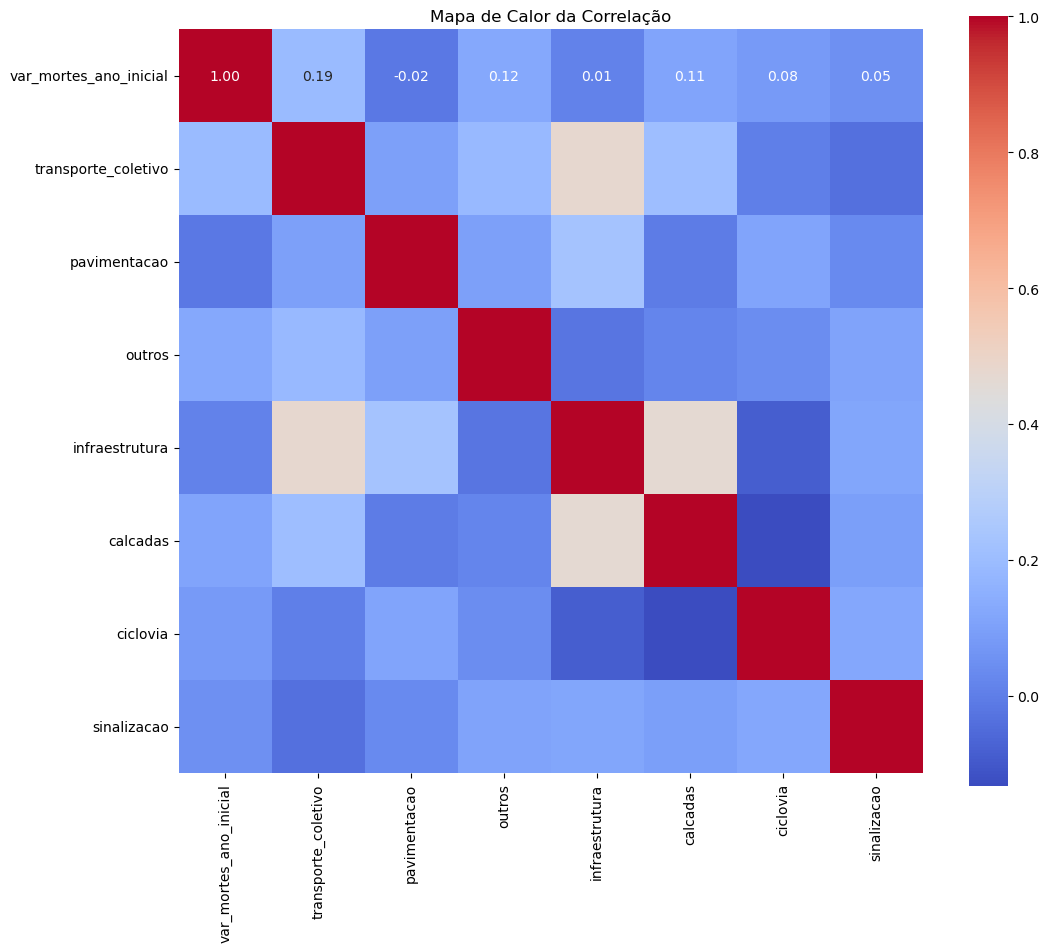

In [135]:
# lista com todas as categorias do df_empreend_treinamento
lista_categorias = df_empreend_treinamento['categoria'].unique().tolist()

# cria uma matriz de correlação
correlation_matrix = df_acidentes_categoria[['var_mortes_ano_inicial'] + lista_categorias].corr()

# plota o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))  # Aumentar o tamanho do gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Calor da Correlação')
plt.show()

In [136]:
correlation_matrix

,var_mortes_ano_inicial,transporte_coletivo,pavimentacao,outros,infraestrutura,calcadas,ciclovia,sinalizacao
var_mortes_ano_inicial,1.000000,0.192058,-0.015019,0.124047,0.009327,0.110043,0.081699,0.050492
transporte_coletivo,0.192058,1.000000,0.100718,0.188567,0.473705,0.205039,-0.000207,-0.038325
pavimentacao,-0.015019,0.100718,1.000000,0.098233,0.227172,-0.005652,0.110423,0.031944
outros,0.124047,0.188567,0.098233,1.000000,-0.023442,0.017530,0.043205,0.108930
infraestrutura,0.009327,0.473705,0.227172,-0.023442,1.000000,0.467371,-0.085053,0.115389
calcadas,0.110043,0.205039,-0.005652,0.017530,0.467371,1.000000,-0.133482,0.094402
ciclovia,0.081699,-0.000207,0.110423,0.043205,-0.085053,-0.133482,1.000000,0.122448
sinalizacao,0.050492,-0.038325,0.031944,0.108930,0.115389,0.094402,0.122448,1.000000


- A **taxa de variação das mortes** parece estar mais fortemente **relacionada com as categorias de transporte coletivo, outros, calçadas**. Ou seja, quando há mais investimentos nessas áreas, a taxa de variação das mortes teve um melhor resultado.
<p></p>
- Por outro lado, não encontramos uma correlação tão evidente entre a taxa de variação das mortes e as outras categorias. Isso sugere que outros fatores além dos empreendimentos podem estar influenciando essa variação.
<p></p>

- **Análise feita para cidades com mais de 300 mil habitantes na intenção de avaliar uma maior diversidade de categorias, considerando que cidades menores tiveram empreendimentos concentrados na categoria de pavimentação**

É importante lembrar que **correlação não é o mesmo que causalidade**. Ou seja, mesmo que haja uma relação entre essas variáveis, não podemos afirmar com certeza que um aumento nos empreendimentos nessas categorias causa diretamente um aumento na taxa de variação das mortes. Outros fatores que não foram considerados também podem estar envolvidos nessa relação.

In [137]:
def analise_comparativa(df_acidentes_categoria, df_empreend_treinamento):
    """
    objetivo: realizar uma análise comparativa dos empreendimentos em relação à taxa de mortes e de feridos
              a cada 100 mil habitantes.

    entrada:
    df_acidentes_categoria (dataframe): dataframe contendo dados sobre acidentes por categoria.
    df_filtrado_emprend (dataframe): dataframe contendo dados sobre empreendimentos.

    saída:
    df_analise_mortes (dataframe): dataframe contendo a análise comparativa em relação à taxa de mortes.
    df_analise_feridos (dataframe): dataframe contendo a análise comparativa em relação à taxa de feridos.
    """

    # Análise comparativa dos empreendimentos nas cidades que apresentam redução superior e inferior a 50%
    # em relação à taxa de mortes a cada 100 mil hab
    df_positivas_mortes = df_acidentes_categoria[
        (df_acidentes_categoria['soma_empredimentos'] >= df_acidentes_categoria['soma_empredimentos'].median()) &
        (df_acidentes_categoria['var_mortes_ano_inicial'] >= 50)]
    df_negativas_mortes = df_acidentes_categoria[
        (df_acidentes_categoria['soma_empredimentos'] >= df_acidentes_categoria['soma_empredimentos'].median()) &
        (df_acidentes_categoria['var_mortes_ano_inicial'] < 50)]

    # Soma dos empreendimentos para cada categoria
    categorias = df_empreend_treinamento['categoria'].unique().tolist()

    soma_positivas_mortes = round(df_positivas_mortes[categorias].mean(), 2)
    soma_negativas_mortes = round(df_negativas_mortes[categorias].mean(), 2)

    # Criação do novo dataframe de análise comparativa em relação à taxa de mortes
    df_analise_mortes = pd.DataFrame({
        'Categoria': categorias,
        'Qtd media empreend cidades >= 50% de redução': soma_positivas_mortes.values,
        'Qtd media empreend cidades < 50% de redução': soma_negativas_mortes.values
    })

    df_analise_mortes['Percentual da variação de empreendimentos por categoria'] = round(
        (df_analise_mortes['Qtd media empreend cidades >= 50% de redução'] / df_analise_mortes[
            'Qtd media empreend cidades < 50% de redução'] - 1) * 100, 2)
    df_analise_mortes = df_analise_mortes.sort_values('Categoria')

    # Análise comparativa dos empreendimentos nas cidades que apresentam redução superior e inferior a 50%
    # em relação à taxa de feridos a cada 100 mil hab
    df_positivas_feridos = df_acidentes_categoria[
        (df_acidentes_categoria['soma_empredimentos'] >= df_acidentes_categoria['soma_empredimentos'].median()) &
        (df_acidentes_categoria['var_feridos_ano_inicial'] > 0)]
    df_negativas_feridos = df_acidentes_categoria[
        (df_acidentes_categoria['soma_empredimentos'] >= df_acidentes_categoria['soma_empredimentos'].median()) &
        (df_acidentes_categoria['var_feridos_ano_inicial'] < 0)]

    # Soma dos empreendimentos para cada categoria
    soma_positivas_feridos = round(df_positivas_feridos[categorias].mean(), 2)
    soma_negativas_feridos = round(df_negativas_feridos[categorias].mean(), 2)

    # Criação do novo dataframe de análise comparativa em relação à taxa de feridos
    df_analise_feridos = pd.DataFrame({
        'Categoria': categorias,
        'Qtd media empreend cidades COM redução': soma_positivas_feridos.values,
        'Qtd media empreend cidades SEM redução': soma_negativas_feridos.values
    })

    df_analise_feridos['Percentual da variação de empreendimentos por categoria'] = round(
        (df_analise_feridos['Qtd media empreend cidades COM redução'] / df_analise_feridos[
            'Qtd media empreend cidades SEM redução'] - 1) * 100, 2)

    return df_analise_mortes, df_analise_feridos

df_analise_mortes, df_analise_feridos = analise_comparativa(df_acidentes_categoria, df_empreend_treinamento)

In [138]:
df_acidentes_categoria['soma_empredimentos'].median()

9.0

A primeira tabela abaixo mostra uma comparação entre a quantidade média de empreendimentos em cidades que conseguiram atingir uma redução na taxa de mortes de 50% ou mais e cidades que atingiram taxas inferiores a 50%, baseado na meta da Década de Ação pela Segurança no Trânsito no período de 2011-2020. Já em relação a taxa de feridos, observou-se anteriormente que os índices em geral aumentaram nos últimos anos em média, portanto, a segunda tabela não se ateve a um percentual determinado, mas sim se houve ou não uma redução na taxa de feridos e comparou com as cidades que não tiveram esse mesmo resultado.

**O objetivo** dessas tabelas é tentar encontrar uma correlação entre as categorias de empreendimentos e a redução nessas taxas.

**Além disso, o filtro utilizado abaixo olha apenas a fatia de cidades com população superior a 300 mil habitantes**


In [139]:
df_analise_mortes

,Categoria,Qtd media empreend cidades >= 50% de redução,Qtd media empreend cidades < 50% de redução,Percentual da variação de empreendimentos por categoria
4,calcadas,1.67,1.40,19.29
5,ciclovia,0.11,0.12,-8.33
3,infraestrutura,3.56,2.72,30.88
2,outros,1.44,0.84,71.43
1,pavimentacao,7.00,7.44,-5.91
6,sinalizacao,0.67,0.44,52.27
0,transporte_coletivo,5.56,2.72,104.41


#### Pontos importantes a serem observados:

1. **Infraestrutura, Sinalização, Outros e Transporte Coletivo:**  
   As categorias de infraestrutura, sinalização, outros e transporte coletivo apresentam uma diferença significativa na média de empreendimentos entre as cidades com redução superior e inferior a 50%. As cidades com redução superior têm uma média de empreendimentos consideravelmente maior do que aquelas com redução inferior.
<p></p>
2. **Pavimentação e Ciclovia:**  
   Contrariamente à expectativa, a categoria de pavimentação e ciclovia mostraram uma média de empreendimentos menor nas cidades com redução superior em comparação com aquelas com redução inferior. Isso sugere que a relação entre a empreendimentos de pavimentação e a redução de acidentes fatais pode não ser tão direta quanto se esperava. Em relação a ciclovia, a análise teve como foco o número total de mortes e não especificamente as mortes de ciclistas.
<p></p>
4. **Calçadas:**  
   Embora a diferença não seja tão grande, a categoria Calçadas mostra um aumento na média de empreendimentos nas cidades com redução superior em comparação com aquelas com redução inferior. Isso pode indicar uma possível correlação entre esses tipos de empreendimento e a redução de acidentes.

In [140]:
df_analise_feridos

,Categoria,Qtd media empreend cidades COM redução,Qtd media empreend cidades SEM redução,Percentual da variação de empreendimentos por categoria
0,transporte_coletivo,3.00,3.80,-21.05
1,pavimentacao,5.21,8.80,-40.80
2,outros,0.71,1.20,-40.83
3,infraestrutura,3.50,2.55,37.25
4,calcadas,2.14,1.00,114.00
5,ciclovia,0.00,0.20,-100.00
6,sinalizacao,0.50,0.50,0.00


1. **Transporte Coletivo, Outros e Sinalização:**  
   A categoria de transporte coletivo e outros diferente do que visto na taxa de mortes, apresentam diferença negativa, indicando uma leve redução na média de empreendimentos nas cidades com redução superior a 50%.
<p></p>
2. **Pavimentação:**  
   Assim como na análise de mortes, a categoria de pavimentação mostra uma diferença significativa, mas negativa, na média de empreendimentos entre as cidades com redução superior e inferior de feridos. Isso sugere que a relação entre pavimentação e redução de feridos pode ser mais complexa do que inicialmente esperado.
<p></p>
3. **Infraestrutura e Calçadas:**  
   As categorias de calçadas e infraestrutura apresentam diferença positiva na média de empreendimentos entre as cidades com redução superior e inferior de feridos. Isso pode indicar uma correlação entre investimentos em estas categorias com a redução de feridos.
<p></p>
4. **Ciclovia:**  
   Assim como na análise de mortes, a categoria de ciclovia mostra uma diferença negativa na média de empreendimentos entre as cidades com redução superior e inferior de feridos.
<p></p>
5. **Sinalização:**  
   A categoria de sinalização se manteve neutra com uma média similar entre as cidades analisadas.

-------

## Modelagem de dados

Abaixo serão apresentados algumas análises utilizando modelagem de dados para classificação de categorias de empreendimentos com modelos de machine learning de classificação e processamento de linguagem natural e também modelos de regressão linear para encontrar possíveis correlações destas categorias de empreedimentos com a redução na taxa de mortes.

## Modelo para classificação de categorias com processamento de linguagem natural

In [141]:
def modelo_classificacao_treinamento(df):
    '''
    objetivo: treinar modelos de classificação (Random Forest e Logistic Regression) para categorização de empreendimentos
              e seleciona o melhor modelo com base na performance

    entrada:
    df (dataframe): dataframe contendo as colunas 'empreendimento' e 'categoria'.

    saída:
    best_model: o melhor modelo de classificação selecionado.
    '''
    
    # aplica a função de pré-processamento ao DataFrame
    df['empreendimento_processado'] = df['empreendimento'].apply(preprocess_text)
    
    # divide o dataframe em duas partes com 50% e 50% dos dados
    df1, df2 = train_test_split(df, test_size=0.5, random_state=42)

    # pega 30% do dataframe e divide os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(df1['empreendimento_processado'], 
                                                        df1['categoria'], test_size=0.2, random_state=42)

    # cria as pipelines para RandomForestClassifier e LogisticRegression
    pipeline_rf = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', RandomForestClassifier())
    ])

    pipeline_lr = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=200))
    ])

    # define os parâmetros para GridSearchCV
    params_rf = {
        'tfidf__max_df': [0.75, 1.0],
        'tfidf__min_df': [1, 2],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20]
    }

    params_lr = {
        'tfidf__max_df': [0.75, 1.0],
        'tfidf__min_df': [1, 2],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 1, 10]
    }

    # executa GridSearchCV para RandomForestClassifier
    grid_rf = GridSearchCV(pipeline_rf, param_grid=params_rf, cv=5, n_jobs=-1, verbose=1)
    grid_rf.fit(X_train, y_train)

    # executa GridSearchCV para LogisticRegression
    grid_lr = GridSearchCV(pipeline_lr, param_grid=params_lr, cv=5, n_jobs=-1, verbose=1)
    grid_lr.fit(X_train, y_train)

    # avaliação dos modelos
    print("Random Forest Classifier")
    print(classification_report(y_test, grid_rf.predict(X_test)))

    print("Logistic Regression")
    print(classification_report(y_test, grid_lr.predict(X_test)))

    # escolhe o melhor modelo baseado na performance
        # verifica se o modelo RandomForest teve um escore melhor, se verdadeiro aplica este modelo, 
        # caso contrário aplica o LogisticRegression
    best_model = grid_rf if grid_rf.best_score_ > grid_lr.best_score_ else grid_lr
    
    return best_model
    
# função para predizer novas categorias e adicionar ao DataFrame
def modelo_classificacao(df):
    
    '''
    objetivo: utilizar um modelo de predição para categorizar os empreendimentos descritos no dataframe
    
    parâmetros de entrada:
    df (dataframe) - dataframe que contenha a coluna 'empreendimento'
    
    saida: 
    df (dataframe) - dataframe com a coluna 'categoria' adicionado utilizando o melhor modelo de predição
    classification_report RFC (report) - tabela de resultados do RandonForestClassifier
    classification_report LR (report) -  tabela de resultados do Logistic Regression
    '''
    
    df['categoria'] = best_model.predict(df['empreendimento'].apply(preprocess_text))
    
    return df

# encontra o melhor modelo de classificação utilizando a base treinada
best_model = modelo_classificacao_treinamento(df_empreend_treinamento)

# adicionando a coluna 'categoria' com os valores previstos
df_empreend_treinado = modelo_classificacao(df_empreend)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Classifier
                     precision    recall  f1-score   support

           calcadas       1.00      0.50      0.67         8
           ciclovia       1.00      1.00      1.00         4
     infraestrutura       0.93      0.93      0.93        15
             outros       0.30      1.00      0.46         3
       pavimentacao       0.97      0.98      0.98        61
        sinalizacao       1.00      0.33      0.50         3
transporte_coletivo       0.95      0.86      0.90        22

           accuracy                           0.91       116
          macro avg       0.88      0.80      0.78       116
       weighted avg       0.95      0.91      0.91       116

Logistic Regression
                     precision    recall  f1-score   support

           calcadas       1.00      0.62      0.77         8
           ciclovia       1.00    

No código acima foi utilizado dois modelos para teste, avaliado aquele que tinha a melhor performance e aplica-se a tabela desejada, a classificação do modelo que atigiu o melhor score. Os modelos avaliados foram:
- **Random Forest Classifier**: Este modelo é uma técnica de aprendizado de máquina baseada em árvores de decisão. Ele cria várias árvores de decisão durante o treinamento e combina seus resultados para obter uma predição mais precisa. Cada árvore na floresta é treinada em uma amostra aleatória dos dados e faz uma votação para determinar a classe final de uma observação.
<p></p>
- **Logistic Regression**: Apesar do nome, a regressão logística é um modelo de classificação. Ele é usado para prever a probabilidade de uma variável dependente pertencer a uma categoria ou classe específica. O modelo calcula a probabilidade usando uma função logística e depois usa um limite para classificar as observações em diferentes classes com base em suas probabilidades.

Ao analisar as métricas de precisão, revocação, F1-Score e acurácia dos modelos Random Forest Classifier e Logistic Regression, podemos observar o seguinte:

#### Random Forest Classifier:

- Acurácia: 0.89
- Precisão (macro avg): 0.86
- Revocação (macro avg): 0.76
- F1-Score (macro avg): 0.75

#### Logistic Regression:

- Acurácia: 0.88
- Precisão (macro avg): 0.87
- Revocação (macro avg): 0.69
- F1-Score (macro avg): 0.72

-------
- A precisão média do Random Forest Classifier foi de 0.89, enquanto a Logistic Regression teve uma precisão média de 0.88. Isso indica que uma taxa ligeiramente superior de previsões corretas.
<p></p>
- Da mesma forma, a F1 média do Random Forest Classifier foi de 0.75, em comparação com 0.72 da Logistic Regression. Isso sugere que a Random Forest Classifier teve um equilíbrio ligeiramente melhor entre precisão e recall.
<p></p>

- Ambos os modelos apresentaram uma alta taxa de acurácia, mas o Random Forest Classifier teve uma acurácia ligeiramente superior (89%) em comparação com a Logistic Regression (88%).


Portanto, com base nessas métricas, pode-se concluir que o **Random Forest Classifier obteve um resultado ligeiramente melhor** em comparação com a Logistic Regression para o conjunto de dados avaliado.

In [142]:
# verificando se faz sentido a categoria criada via código para fazer os ajustes necessários nas listas sugeridas acima

pd.set_option('display.max_colwidth', None) # código que mostra todo o textode uma célula

# filtro para mostrar apenas 2 colunas para uma cidade especifica
comparacao_categorias_treinado = df_empreend_treinado[['empreendimento', 'categoria']]
comparacao_categorias_manual = df_empreend_treinado_manual[['empreendimento', 'categoria']]
comparacao_categorias_manual = comparacao_categorias_manual.rename(columns={'categoria': 'categoria_manual'})

comparacao_final = comparacao_categorias_treinado.merge(comparacao_categorias_manual, how='left', on='empreendimento')

In [143]:
df_empreend_treinado['categoria'].value_counts()

categoria
pavimentacao           24975
infraestrutura          3277
calcadas                1691
outros                   689
transporte_coletivo      577
sinalizacao              145
ciclovia                  56
Name: count, dtype: int64

In [144]:
df_empreend_treinado_manual['categoria'].value_counts()

categoria
pavimentacao           23399
infraestrutura          2982
calcadas                2003
transporte_coletivo      986
sinalizacao              947
outros                   920
ciclovia                 115
seguranca                 58
Name: count, dtype: int64

In [145]:
comparacao_final[comparacao_final['categoria'] != comparacao_final['categoria_manual']]

,empreendimento,categoria,categoria_manual
2790,"CONSTRUÇÃO DE CICLOVIA A SER IMPLANTADA À MARGEM DA PE 275, LIGAÇÃO ENTRE A RUA MANOEL MARQUES E A RUA MANOEL RESENDE DE FRANÇA NO MUNICÍPIO DE BREJINHO - PE.",pavimentacao,ciclovia
2803,RECAPEAMENTO ASFALTICO E SINALIZACAO DE DIVERSAS RUAS DO PARQUE CAPIBARIBE NO MUNICIPIO DE S.LOURENCO,pavimentacao,sinalizacao
2804,RECAPEAMENTO ASFÁLTICO E SINALIZAÇÃO DE DIVERSAS RUAS DESTE MUNICIPIO.,pavimentacao,sinalizacao
2838,ACÕES DE INFRA-ESTRUTURA URBANA-RECAPEAMENTO ASFALTICO,infraestrutura,pavimentacao
2841,"PAV.ASFALT.P.M.F(3,0 CM) R.JOSE GOMES E TRECHO DA R. JOANA PEDI SIRIANI E SUAS CONFLUENCIAS NO BAIRRO JD.DO TREVO",pavimentacao,outros
...,...,...,...
978064,CONSTRUÇÃO DE UMA PRAÇA PARA EVENTOS E RECREAÇÃO.,calcadas,outros
978163,CALÇAMENTO EM PEDRAS DE VIAS URBANAS,pavimentacao,outros
978537,"CALÇAMENTO NAS VIAS URBANAS DO MUNICÍPIO, EM ESPECIAL OS ACESSOS PRINCIPAIS E A NA AV. APARÍCIO DE SOUZA. PARA ESTE PROJETO, O CALÇAMENTO É DE PARALELEPÍPEDOS (PEDRAS RETANGULARES DE 13X13X15 CM, APROXIMADAMENTE).",pavimentacao,outros
978553,"SERVIÇOS DE PAVIMENTAÇÃO, TERRAPLANAGEM, DRENAGEM COM IMPLANTAÇÃO DE PASSEIOS PÚBLICOS E RECAMPEAMENTO SOBRE PAVIMENTAÇÃO PREEXISTENTE.",pavimentacao,calcadas


Quando fazemos uma comparação entre os resultados obtidos pela classificação manual x classificação via machine learning, notamos que existem algumas divergências e que em alguns momentos o processo manual foi mais assertivo em comparação ao efetuado pelo modelo. Para melhorar esse modelo, podemos:

- Aumentar a base de treinamento, aqui foi utilizado 50% da base de cidades com população superior a 300 mil habitantes.
- Melhorar o código para que seja possível priorizar determinados padrões quando houver semelhanças nos empreendimentos.

Além disso, vale ressaltar que as divergências foram causadas devido aos conceitos de priorização de categorias feito no processo manual. Onde o código identifica dentro do contexto do empreendimento, palavras chaves e prioriza aquelas que foi determinada pelo time de especialistas.

Na imagem abaixo, foi destacado em amarelo aqueles empreendimentos que foram melhor classificados manualmente e em verde aqueles melhor classificados pelo modelo preditivo

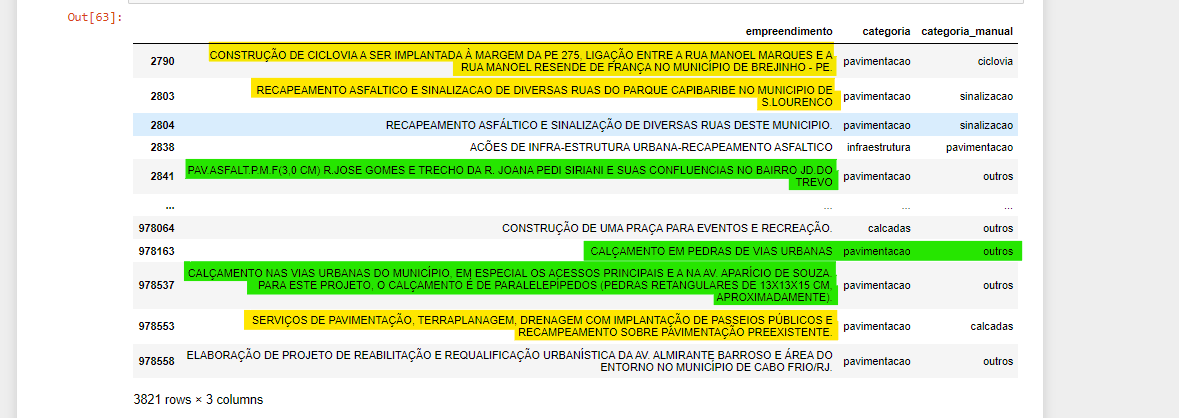



## Modelo de regressão linear para verificar uma possível correlação entre os empreendimentos e a variacao de mortes no periodo de 10 anos

In [146]:
def remove_outliers_iqr(df, colunas):
    """
    objetivo: remover outliers de um dataframe utilizando o método do Intervalo Interquartil (IQR).

    entrada:
    - df (dataframe): dataframe contendo os dados.
    - colunas (list): lista de nomes de colunas das quais os outliers serão removidos.

    saída:
    df (dataframe): dataframe com outliers removidos das colunas especificadas.
    """
    for coluna in colunas:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df

def treinar_e_avaliar_modelos(df_acidentes_categoria, caracteristicas, variavel_alvo):
    """
    objetivo: treinar e avaliar diferentes modelos de regressão para encontrar o modelo que melhor consiga encontrar
              uma correlação entre os empreendimentos e a taxa de mortes.

    entrada:
    - df_acidentes_categoria (dataframe): dataframe contendo os dados agrupados das cidades que contenha as categorias e a taxa de mortes
    - caracteristicas (list): lista de nomes de colunas das categorias.
    - variavel_alvo (str): nome da coluna que contém a variável alvo, neste caso 'var_mortes_ano_inicial'
    """
    
    df = df_acidentes_categoria.copy()
    
    # remove outliers das características das obras e empreendimentos
    dados_sem_outliers = remove_outliers_iqr(df, caracteristicas)

    # seleciona as características das obras e empreendimentos e a variável de destino após a remoção de outliers
    X = dados_sem_outliers[caracteristicas]
    y = dados_sem_outliers[variavel_alvo]

    # divide os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelos
    modelos = {
        "Regressão Linear Múltipla": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
        "Rede Neural Artificial (ANN)": MLPRegressor(random_state=42)
    }

    melhor_modelo = None
    melhor_r2 = float("-inf")

    # Treinamento e avaliação dos modelos
    for nome, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        previsoes = modelo.predict(X_test)
        r2 = r2_score(y_test, previsoes)
        print(f"{nome}: Coeficiente de Determinação (R²): {r2}")
        if r2 > melhor_r2:
            melhor_modelo = nome
            melhor_r2 = r2

    return melhor_modelo, melhor_r2

lista_categorias = df_empreend_treinamento['categoria'].unique().tolist()

treinar_e_avaliar_modelos(df_acidentes_categoria, lista_categorias,  'var_mortes_ano_inicial')

Regressão Linear Múltipla: Coeficiente de Determinação (R²): -0.2728502410271856
Random Forest: Coeficiente de Determinação (R²): -0.06492626247497801
Gradient Boosting: Coeficiente de Determinação (R²): -0.04294151762042464
Árvore de Decisão: Coeficiente de Determinação (R²): -0.1775807360976729
Rede Neural Artificial (ANN): Coeficiente de Determinação (R²): -0.11583774184401241


('Gradient Boosting', -0.04294151762042464)

### Resultados encontrados para a base de cidades com mais de 300 mil habitantes

### Modelos Avaliados e Seus Coeficientes de Determinação (R²)

- **Regressão Linear Múltipla:** Coeficiente de Determinação (R²): -0.2728502410271856
- **Random Forest:** Coeficiente de Determinação (R²): -0.06492626247497801
- **Gradient Boosting:** Coeficiente de Determinação (R²): -0.04294151762042464
- **Árvore de Decisão:** Coeficiente de Determinação (R²): -0.1775807360976729
- **Rede Neural Artificial (ANN):** Coeficiente de Determinação (R²): -0.11583774184401241

### Conclusões

 **Desempenho Negativo de Todos os Modelos:**
   Todos os modelos avaliados apresentaram coeficientes de determinação (R²) negativos. Isso indica que os modelos não foram capazes de explicar a variabilidade dos dados, e na verdade, estão performando pior do que uma simples média.




---------

## Considerações finais do projeto

Ao término da análise, algumas hipóteses e possíveis causas para o desempenho observado na investigação da relação entre os empreendimentos de mobilidade urbana e as taxas de mortalidade no trânsito foram identificadas:

### Base de Dados
- **Ausência de Informações Relevantes:** A ausência de informações relevantes, o preenchimento errado ou insuficiente pode ter prejudicado a compreensão da relação entre os empreendimentos e as taxas de mortalidade no trânsito.
<p></p>
- **Outras obras não listadas:** Ainda que a base de dados dos empreendimentos estivesse robusta, outras obras podem ter sido realizadas nos municípios analisados por fontes de recursos próprios ou por meio de outros programas não relacionados na base de dados atual. A dificuldade no rastreio de tais possíveis obras pode ter comprometido a identificação das ações de trânsito que contribuíram para reduções nas taxas de mortalidade em algumas cidades que apresentaram bons índices neste quesito.
<p></p>
- **Variáveis Não Capturadas:** É possível que outros fatores relevantes não estejam sendo considerados nos dados, como condições meteorológicas, características demográficas, ou políticas de educação no trânsito.

### Complexidade da Relação
- **Fatores interconectados:** A relação entre as características dos empreendimentos de mobilidade urbana e as taxas de mortalidade no trânsito é complexa, envolvendo uma série de fatores interconectados que não foram completamente capturados pelos modelos utilizados. Exemplos incluem ações de educação no trânsito e o fator comportamental dos usuários no sistema viário.

Em resumo, embora esta análise tenha fornecido percepções relevantes, é importante reconhecer as limitações inerentes aos dados e aos modelos utilizados. Futuras pesquisas devem abordar essas questões para avançar na compreensão da relação entre os empreendimentos de mobilidade urbana e a segurança no trânsito, contribuindo para a formulação de políticas mais eficazes e intervenções mais direcionadas.

## Recomendações para futuros avanços

- **Aprimoramento da captação e manutenção da base de dados:** Garantir uma base mais sólida, envolvendo a colaboração com órgãos governamentais de todas as esferas.
<p></p>
- **Expansão do Escopo de Variáveis:** Adicionar outras variáveis de forma a expandir o escopo analisado, como condições meteorológicas, características demográficas, obras de outros empreendimentos/programas e implementação de políticas de educação de trânsito.
<p></p>
- **Reavaliação dos Modelos:** Com melhorias implantadas na manutenção dos bancos de dados, realizar novamente os modelos aqui propostos, permitindo uma nova análise dos resultados em busca de uma validação estatística.

Desta forma, espera-se que, com as melhorias na base de dados e a inclusão de novas variáveis, seja possível obter uma compreensão mais precisa e abrangente da relação entre empreendimentos de mobilidade urbana e segurança no trânsito.
